# Load Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.svm import SVR



from sklearn import metrics


%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/Jessadakorn-pun/Dataset/main/HousingData.csv'
df = pd.read_csv(url)
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87   NaN  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87   NaN  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

In [3]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='median')
df['LSTAT'] = imp.fit_transform(df[['LSTAT']])
df['LSTAT'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: LSTAT
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [4]:
X = df[['LSTAT']]
y = df['MEDV']

# Spliting data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, random_state=1)

# Standardized Data

In [9]:
sc = StandardScaler()
X_train_t = sc.fit_transform(X_train)
X_test_t = sc.transform(X_test)

# Train model

In [14]:
def train(model, X_train, X_train_p, y_train, X_test, X_test_p, y_test, model_name, cols):
    ## fitting model
    model.fit(X_train_p, y_train)
    ####model = rc.estimator_
    #coef = model.coef_
    #inter = model.intercept_ 
    
    ## predict
    y_train_pred = model.predict(X_train_p)
    y_test_pred = model.predict(X_test_p)
    
    ## score
    mse_tr = metrics.mean_squared_error(y_train, y_train_pred)
    mse_te = metrics.mean_squared_error(y_test, y_test_pred)
    r2_tr = metrics.r2_score(y_train, y_train_pred)
    r2_te = metrics.r2_score(y_test, y_test_pred)
    
    ## cols = ['model name', 'Coef', 'Intercept', 'MSE Train', 'MSE Test', 'R2 Train', 'R2 Test']
    collect = [model_name, mse_tr, mse_te, r2_tr, r2_te]
    
    ## ploting result
    #inliner_mask = rc.inlier_mask_
    #outliner_mask = np.logical_not(inliner_mask)
    
    
    
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))
    ax[0].scatter(X_train, y_train_pred, color = 'black', lw = 2, alpha = .5)
    ax[0].scatter(X_train, y_train, c = 'green', alpha = .5)
    ax[0].set_title(f'Train Data : {model_name}')
    #ax[0].scatter(X_train[inliner_mask], y_train[inliner_mask], color = 'orange', edgecolors = 'black', alpha=.5)
    
    ax[1].scatter(X_test, y_test_pred, color = 'black', lw = 2,  alpha = .5)
    ax[1].scatter(X_test, y_test, c = 'blue', alpha = .5)
    ax[1].set_title(f'Test Data : {model_name}')
    #ax[1].scatter(X_test[inliner_mask], y_test[inliner_mask], color = 'red', alpha=.5)
    
    fig, ax = plt.subplots(1, 2, figsize = (20, 10))
    ax[0].scatter(y_train_pred, y_train - y_train_pred, c = 'orange', alpha = .5)
    ax[0].set_title(f'Train Data : Residual Plot')
    ax[0].axhline(0, linestyle='--', color = 'black')
    #ax[0].axes.set_aspect('equal')
    
    ax[1].scatter(y_test_pred, y_test - y_test_pred, c = 'orange', alpha = .5)
    ax[1].set_title(f'Train Data : Residual Plot')
    ax[1].axhline(0, linestyle='--', color = 'black')
    #ax[1].axes.set_aspect('equal')
    
    return collect

model name   MSE Train    MSE Test  R2 Train  \
0  poly : c - 1000 and epsilon - 0.001   28.156482   35.124190  0.653199   
1   poly : c - 1000 and epsilon - 0.01   28.152126   35.122956  0.653252   
2    poly : c - 1000 and epsilon - 0.1   28.246319   35.297710  0.652092   
3      poly : c - 1000 and epsilon - 1   27.788624   34.979462  0.657729   
4     poly : c - 1000 and epsilon - 10   35.779013   42.179019  0.559312   
5    poly : c - 1000 and epsilon - 100  107.816412  112.064671 -0.327967   

    R2 Test  
0  0.616776  
1  0.616790  
2  0.614883  
3  0.618355  
4  0.539804  
5 -0.222686

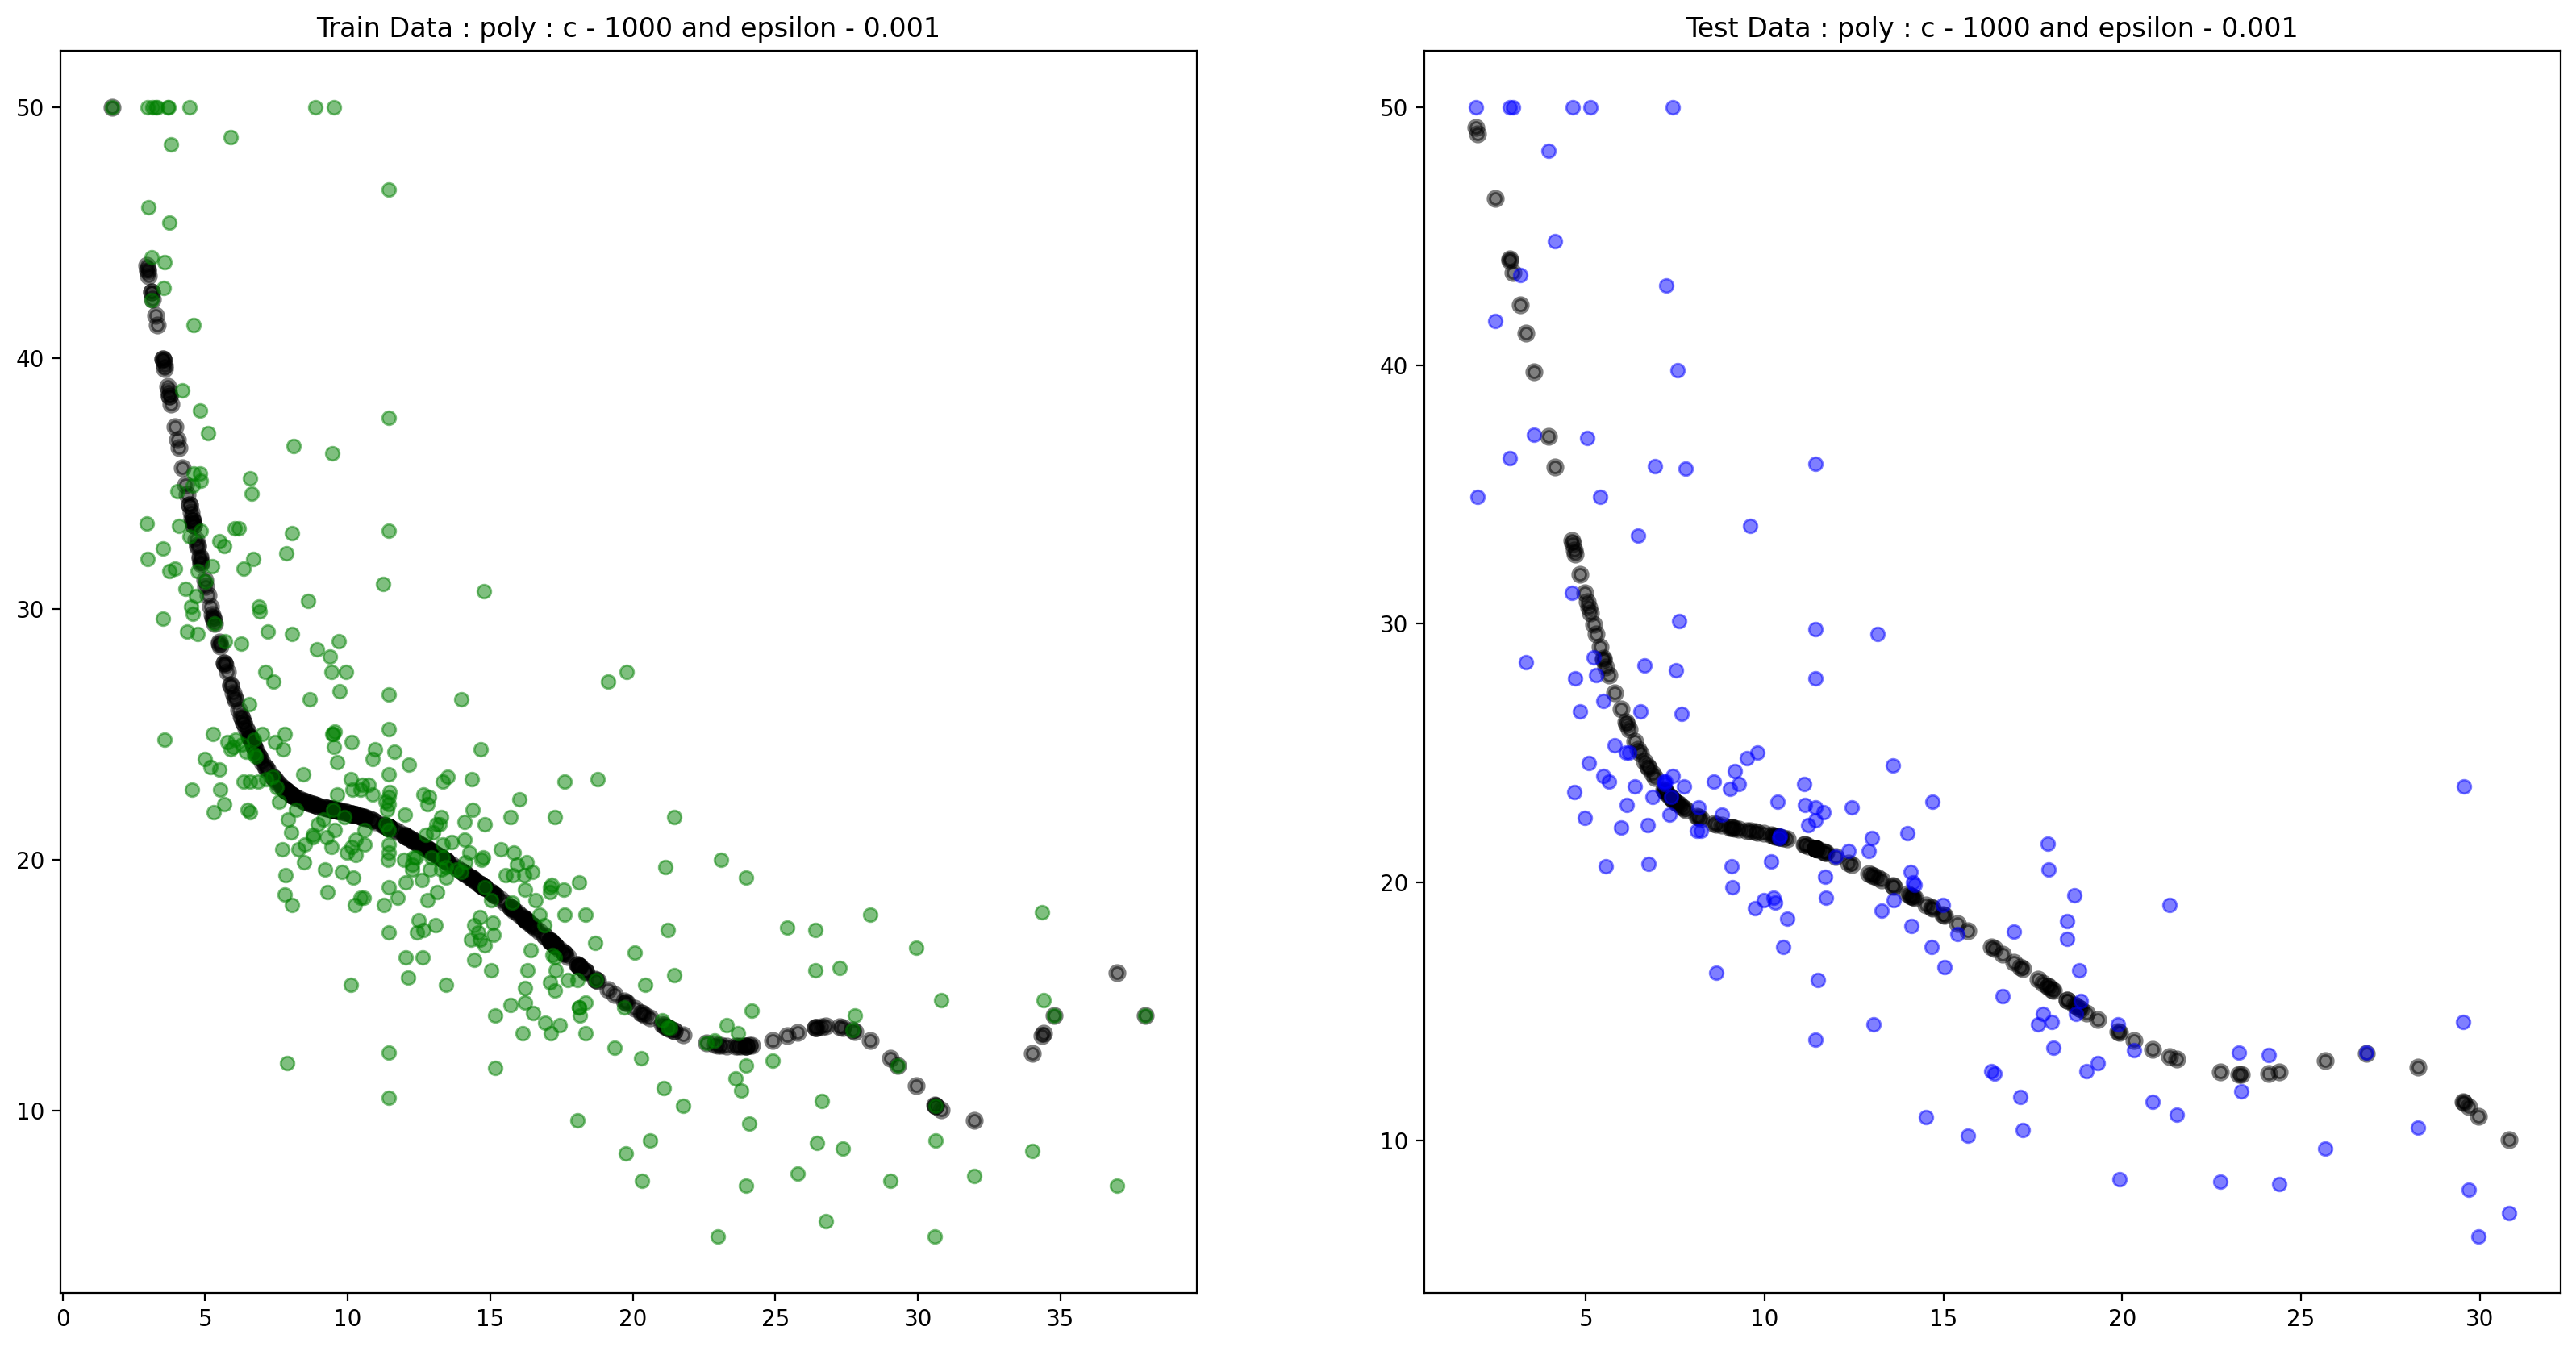

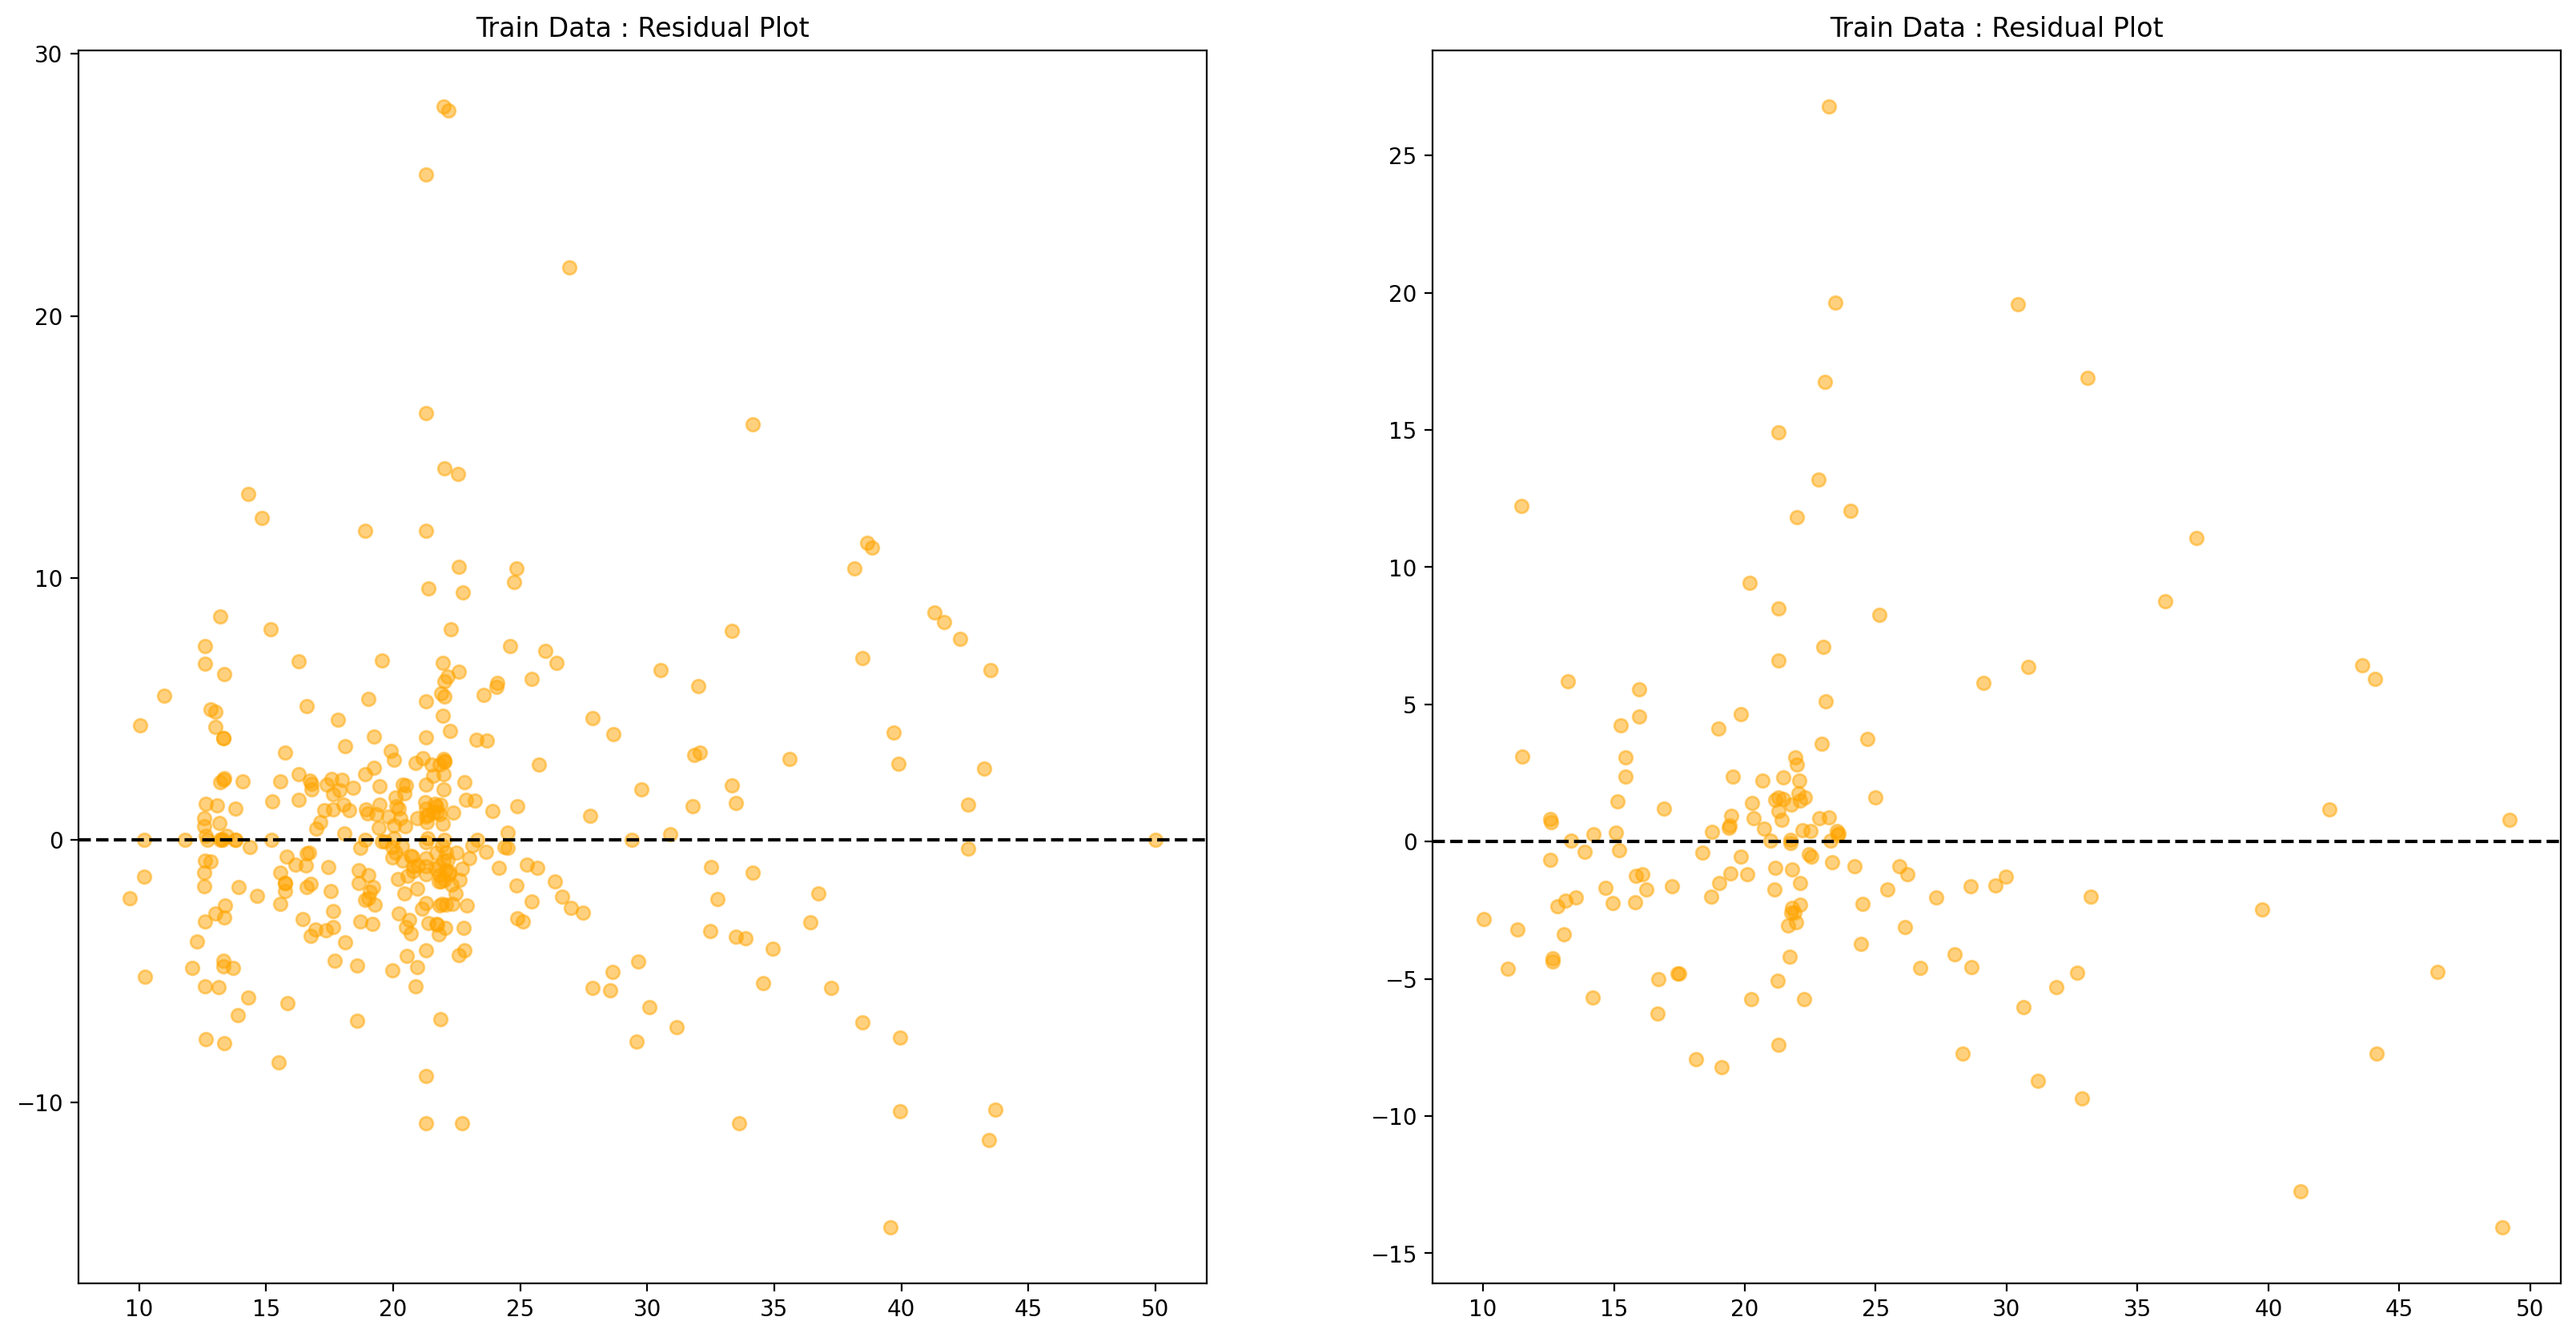

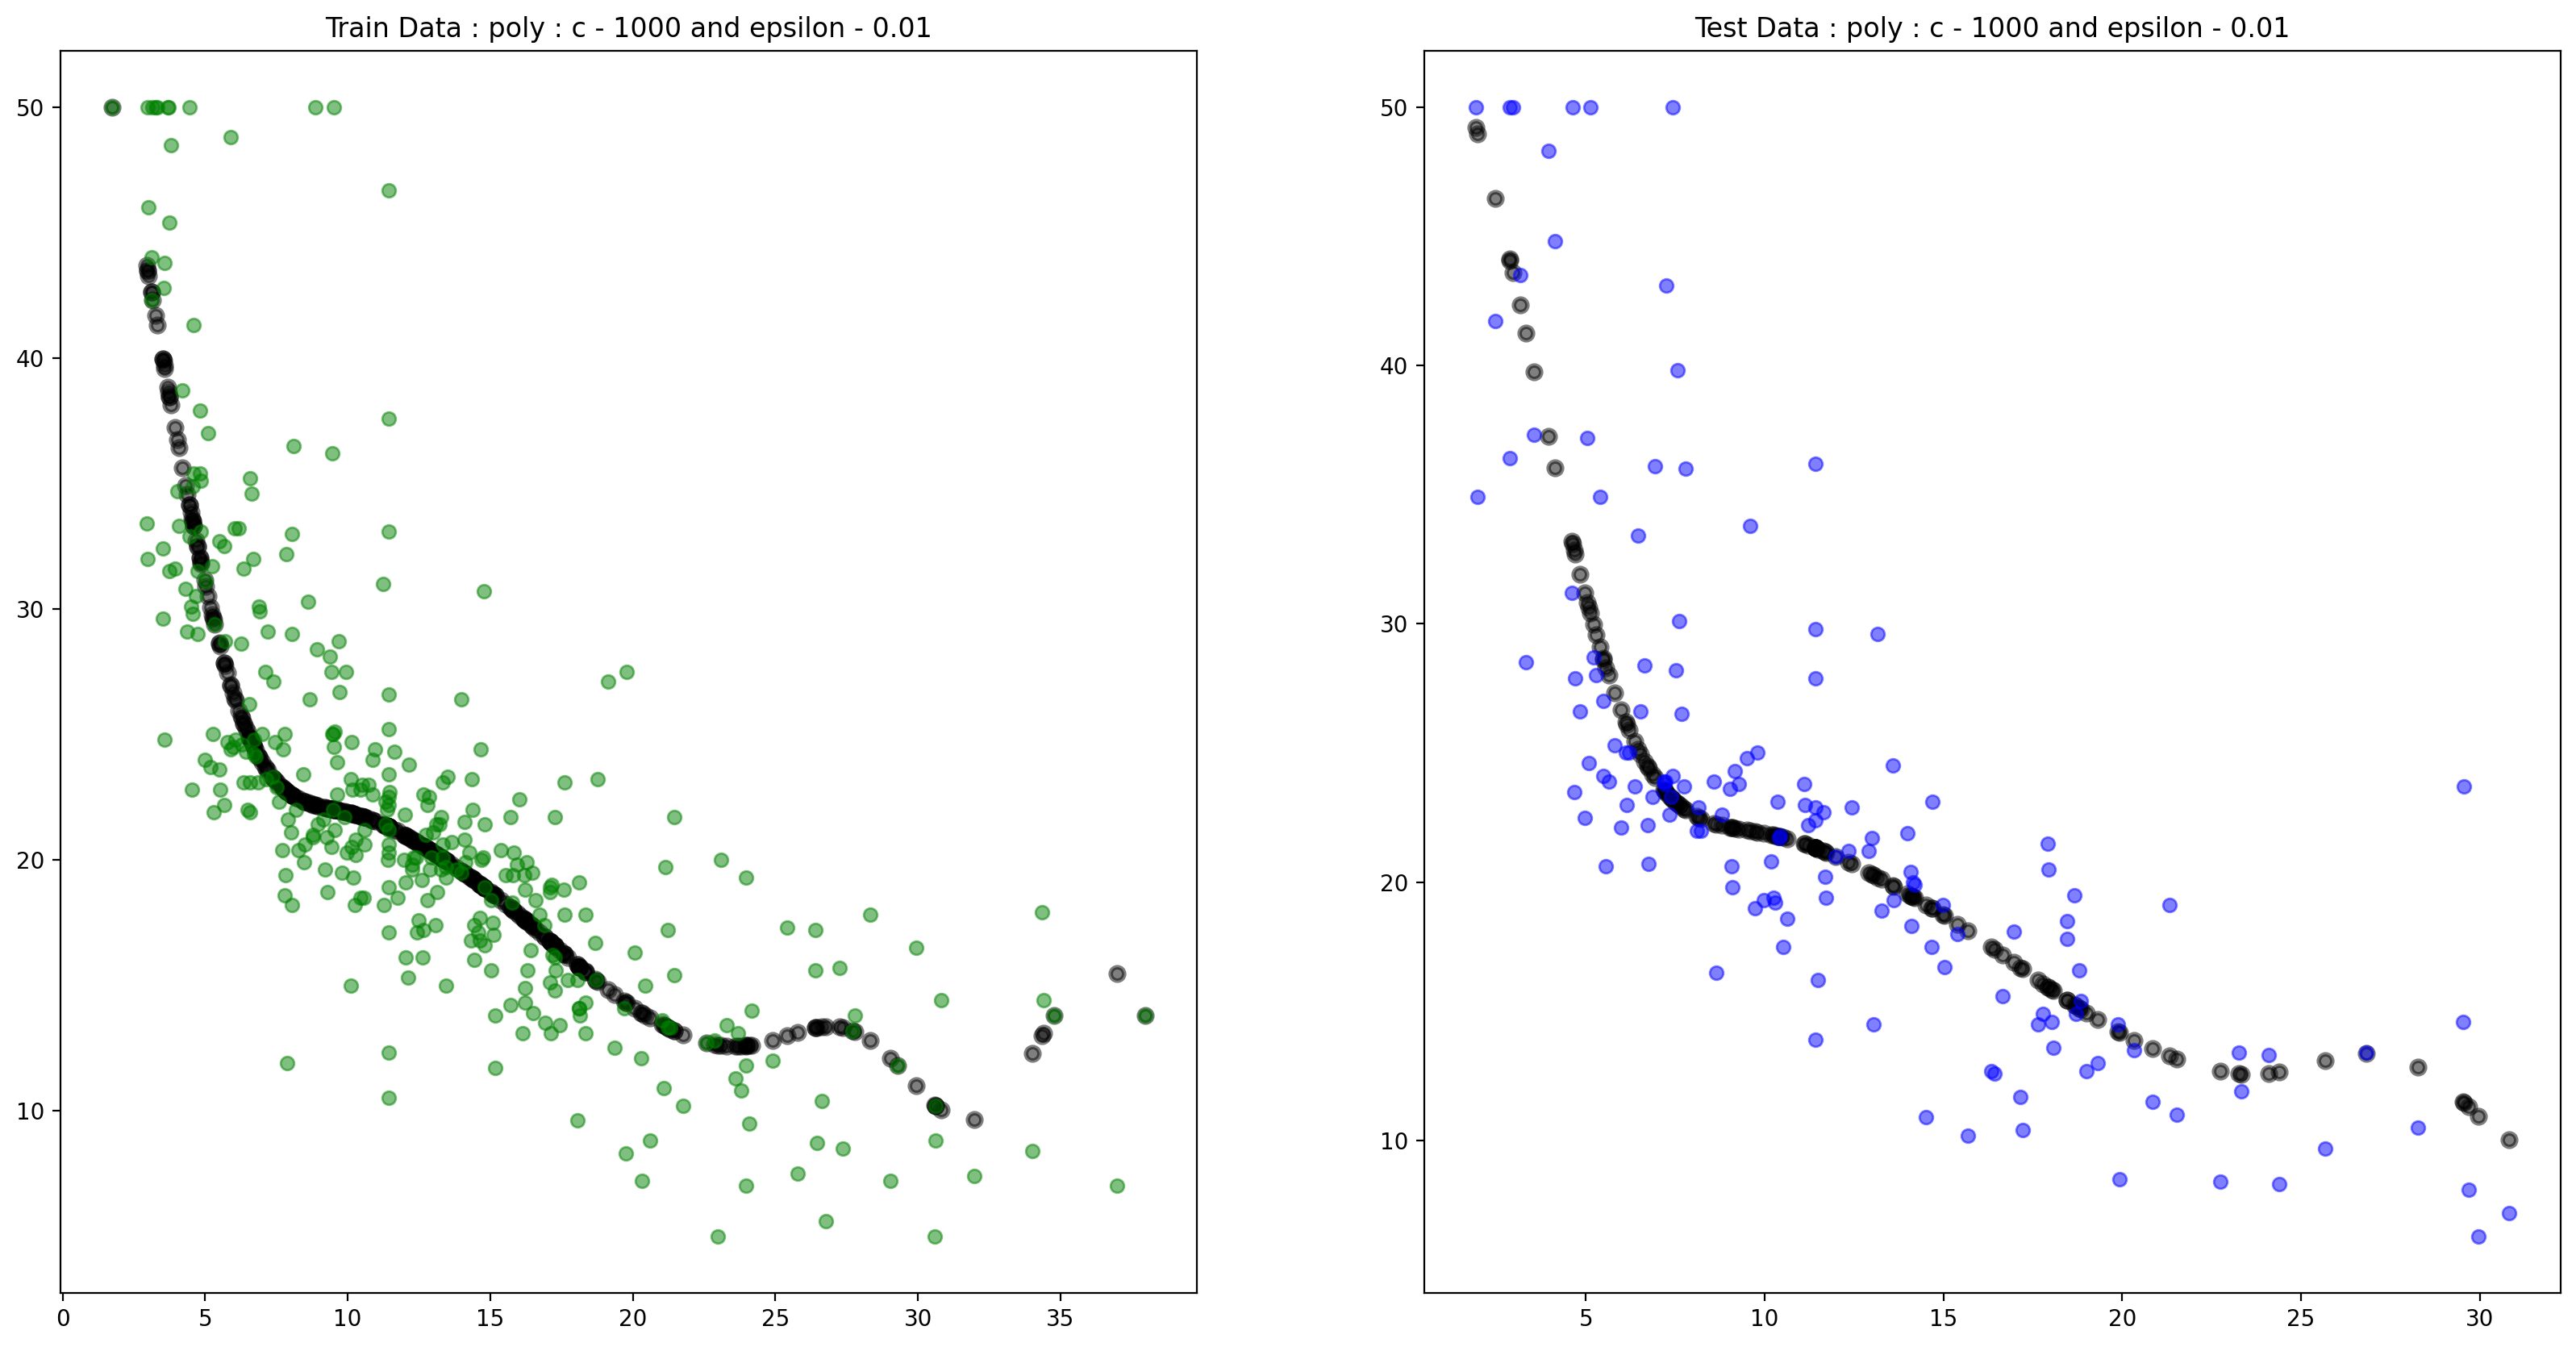

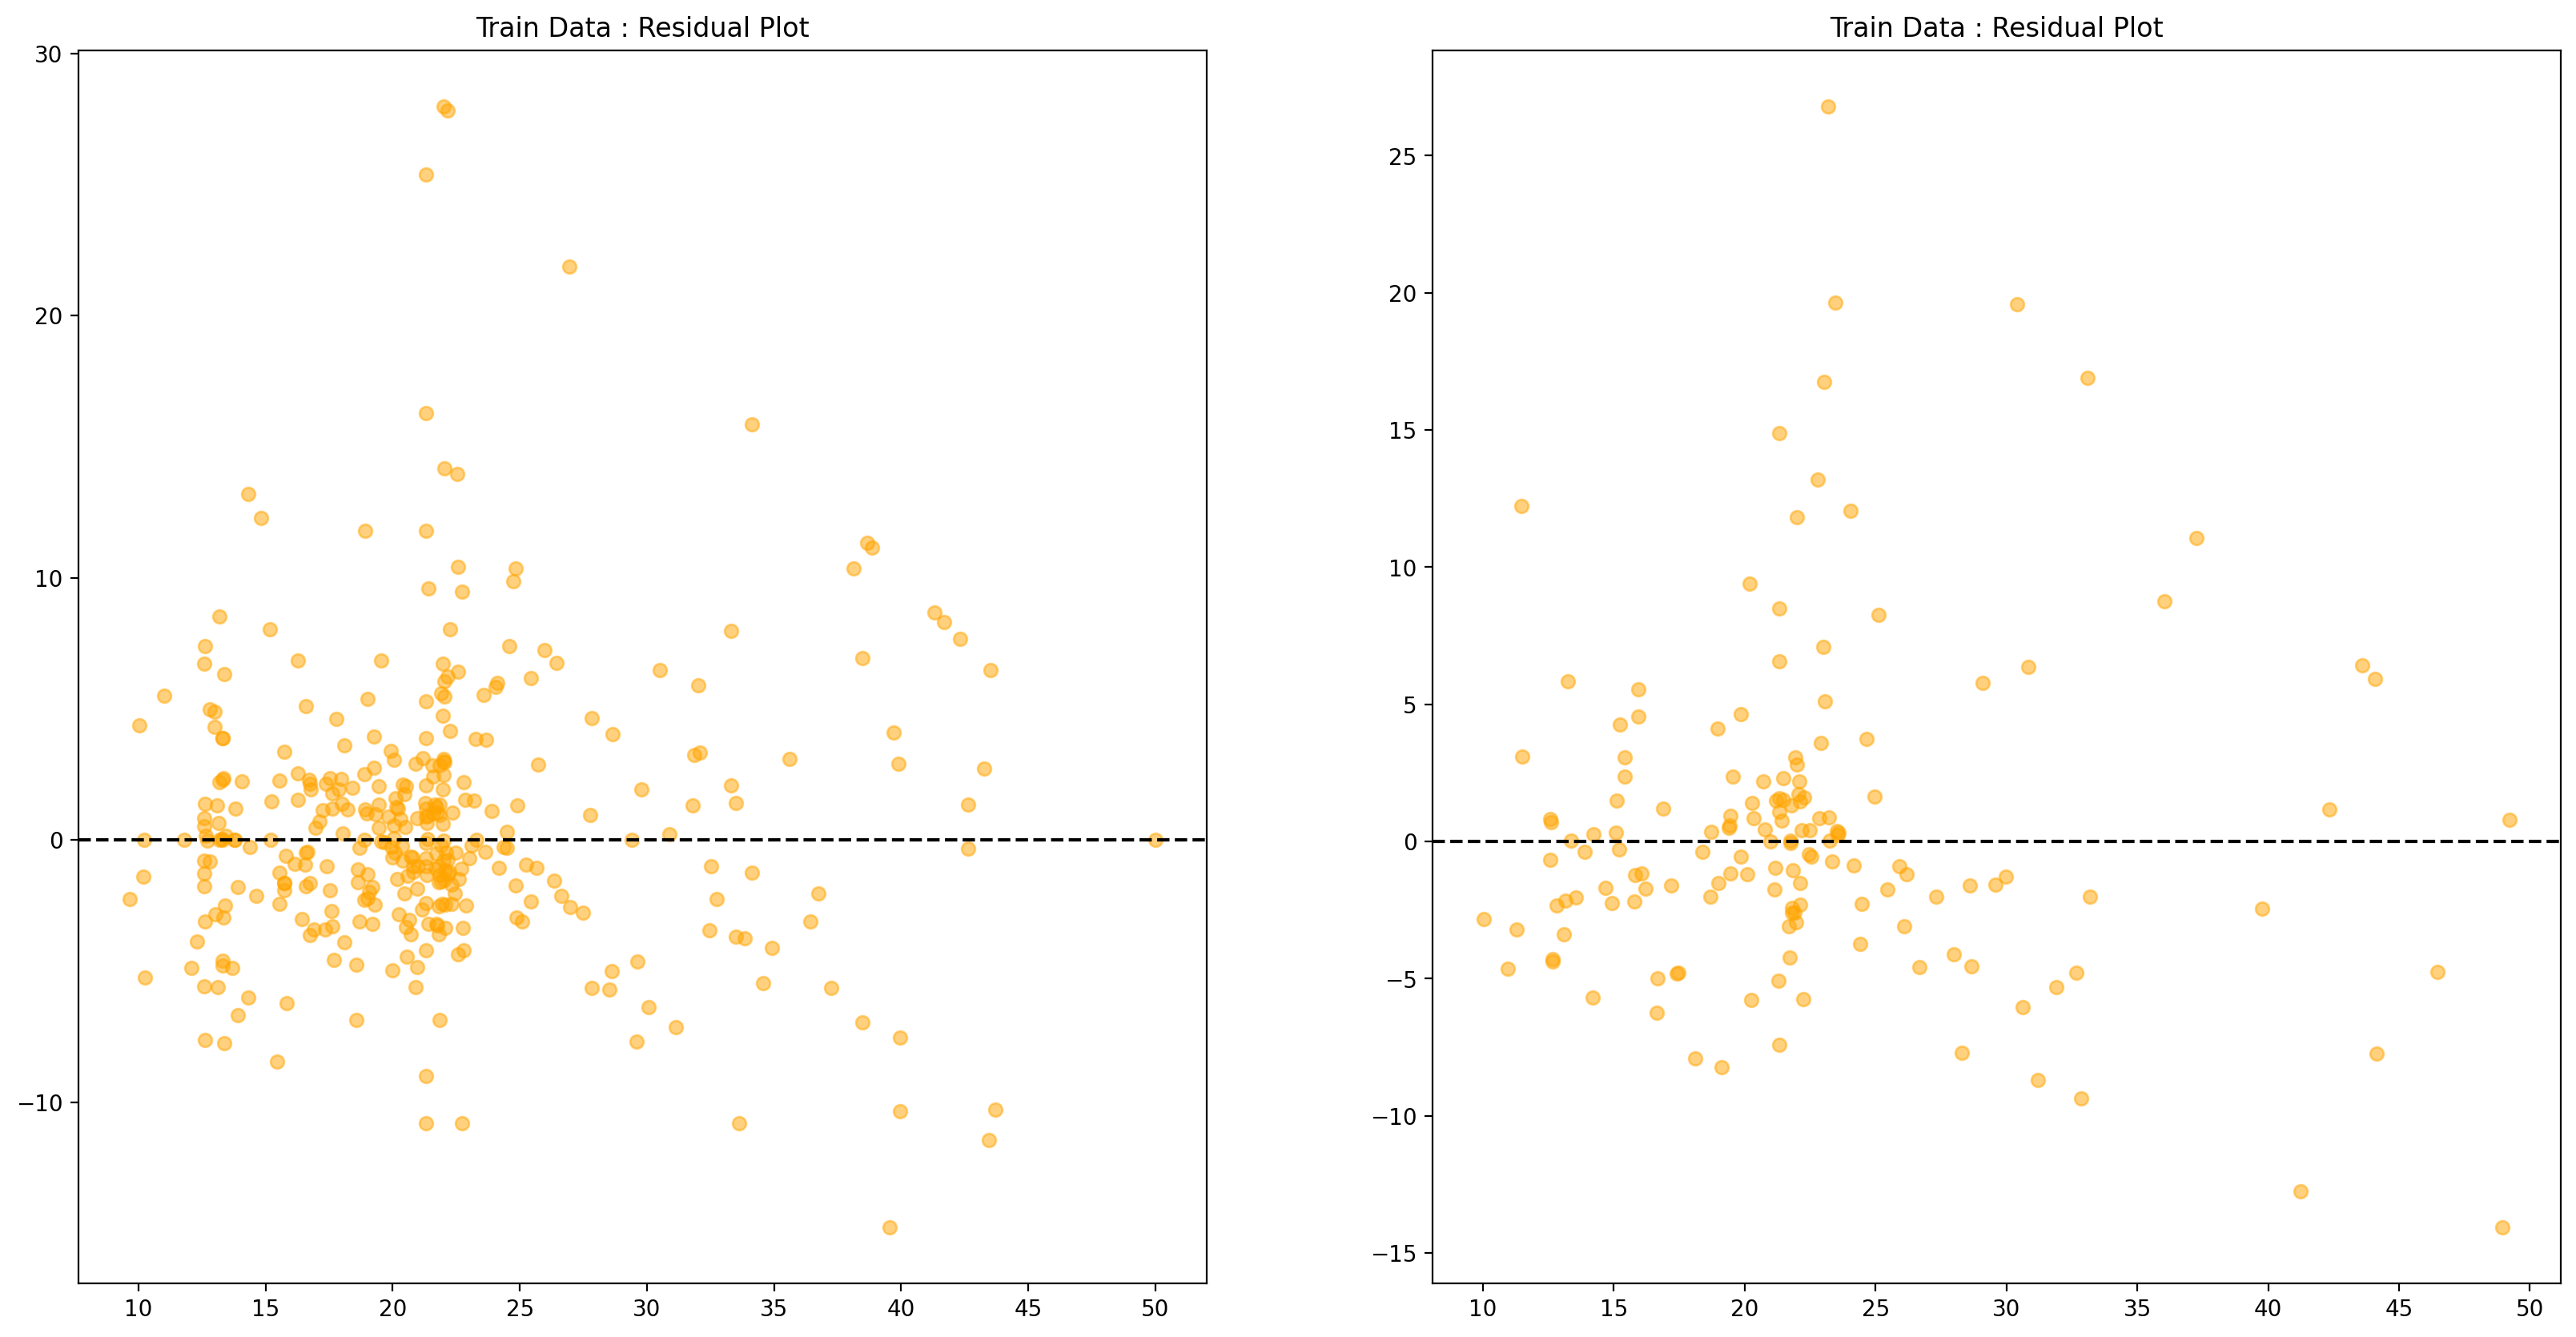

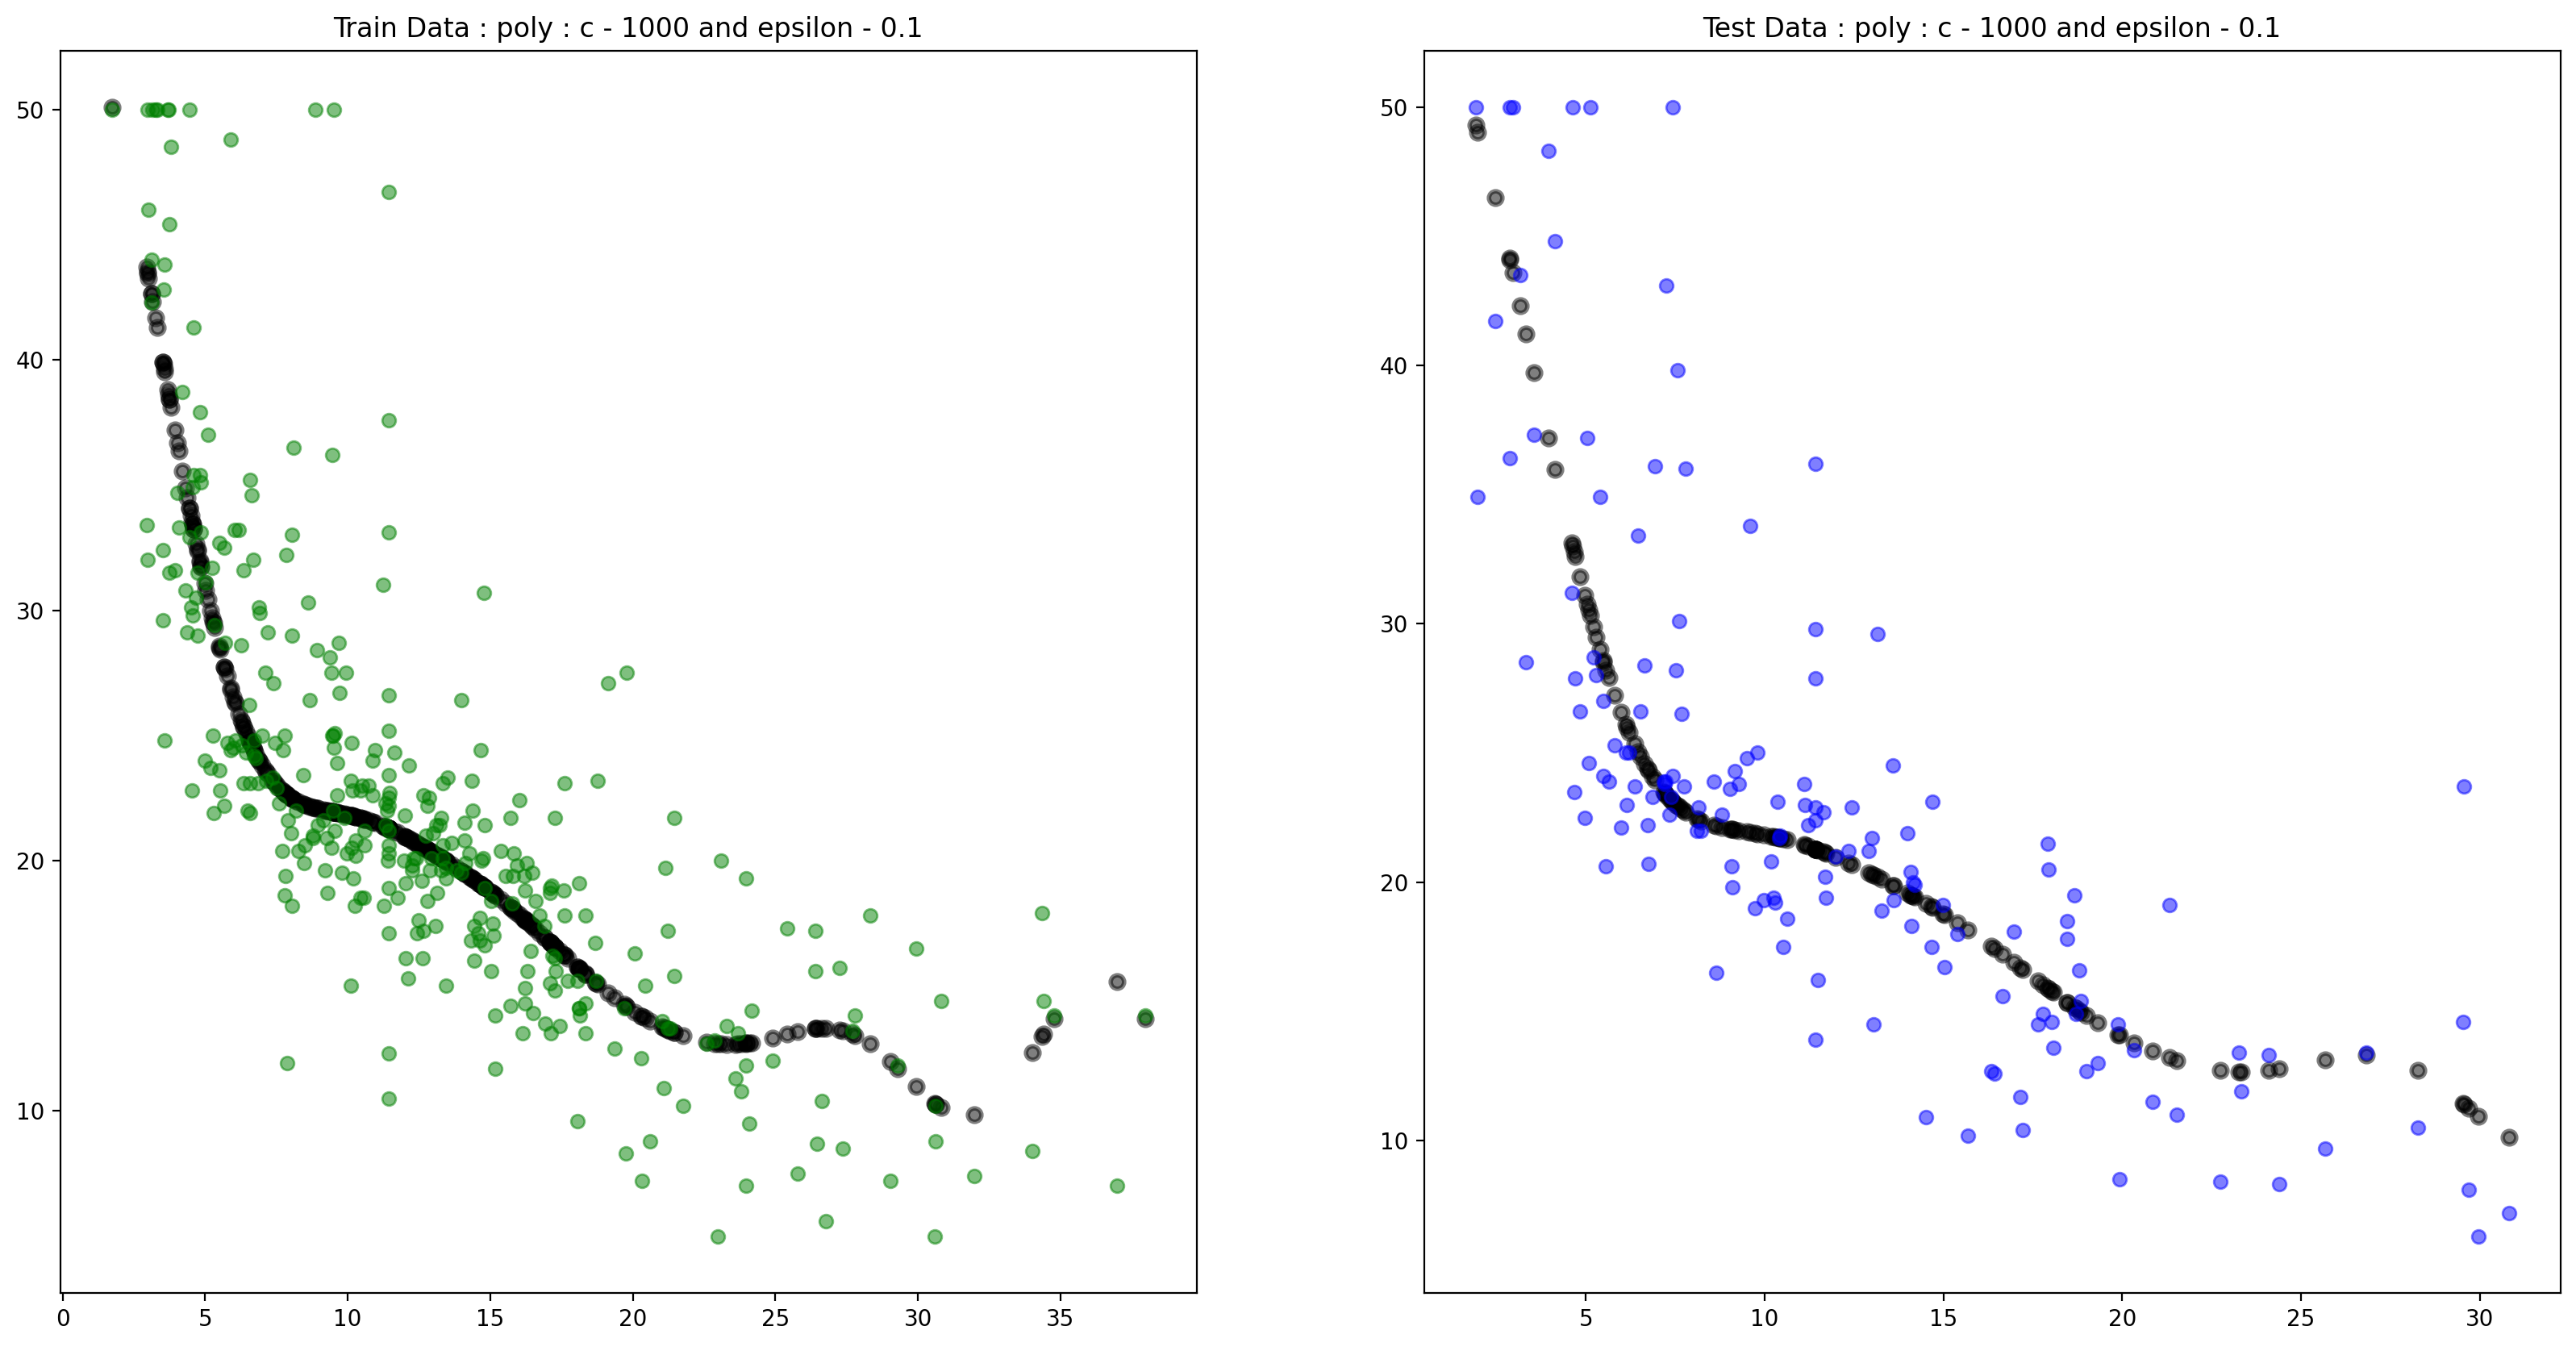

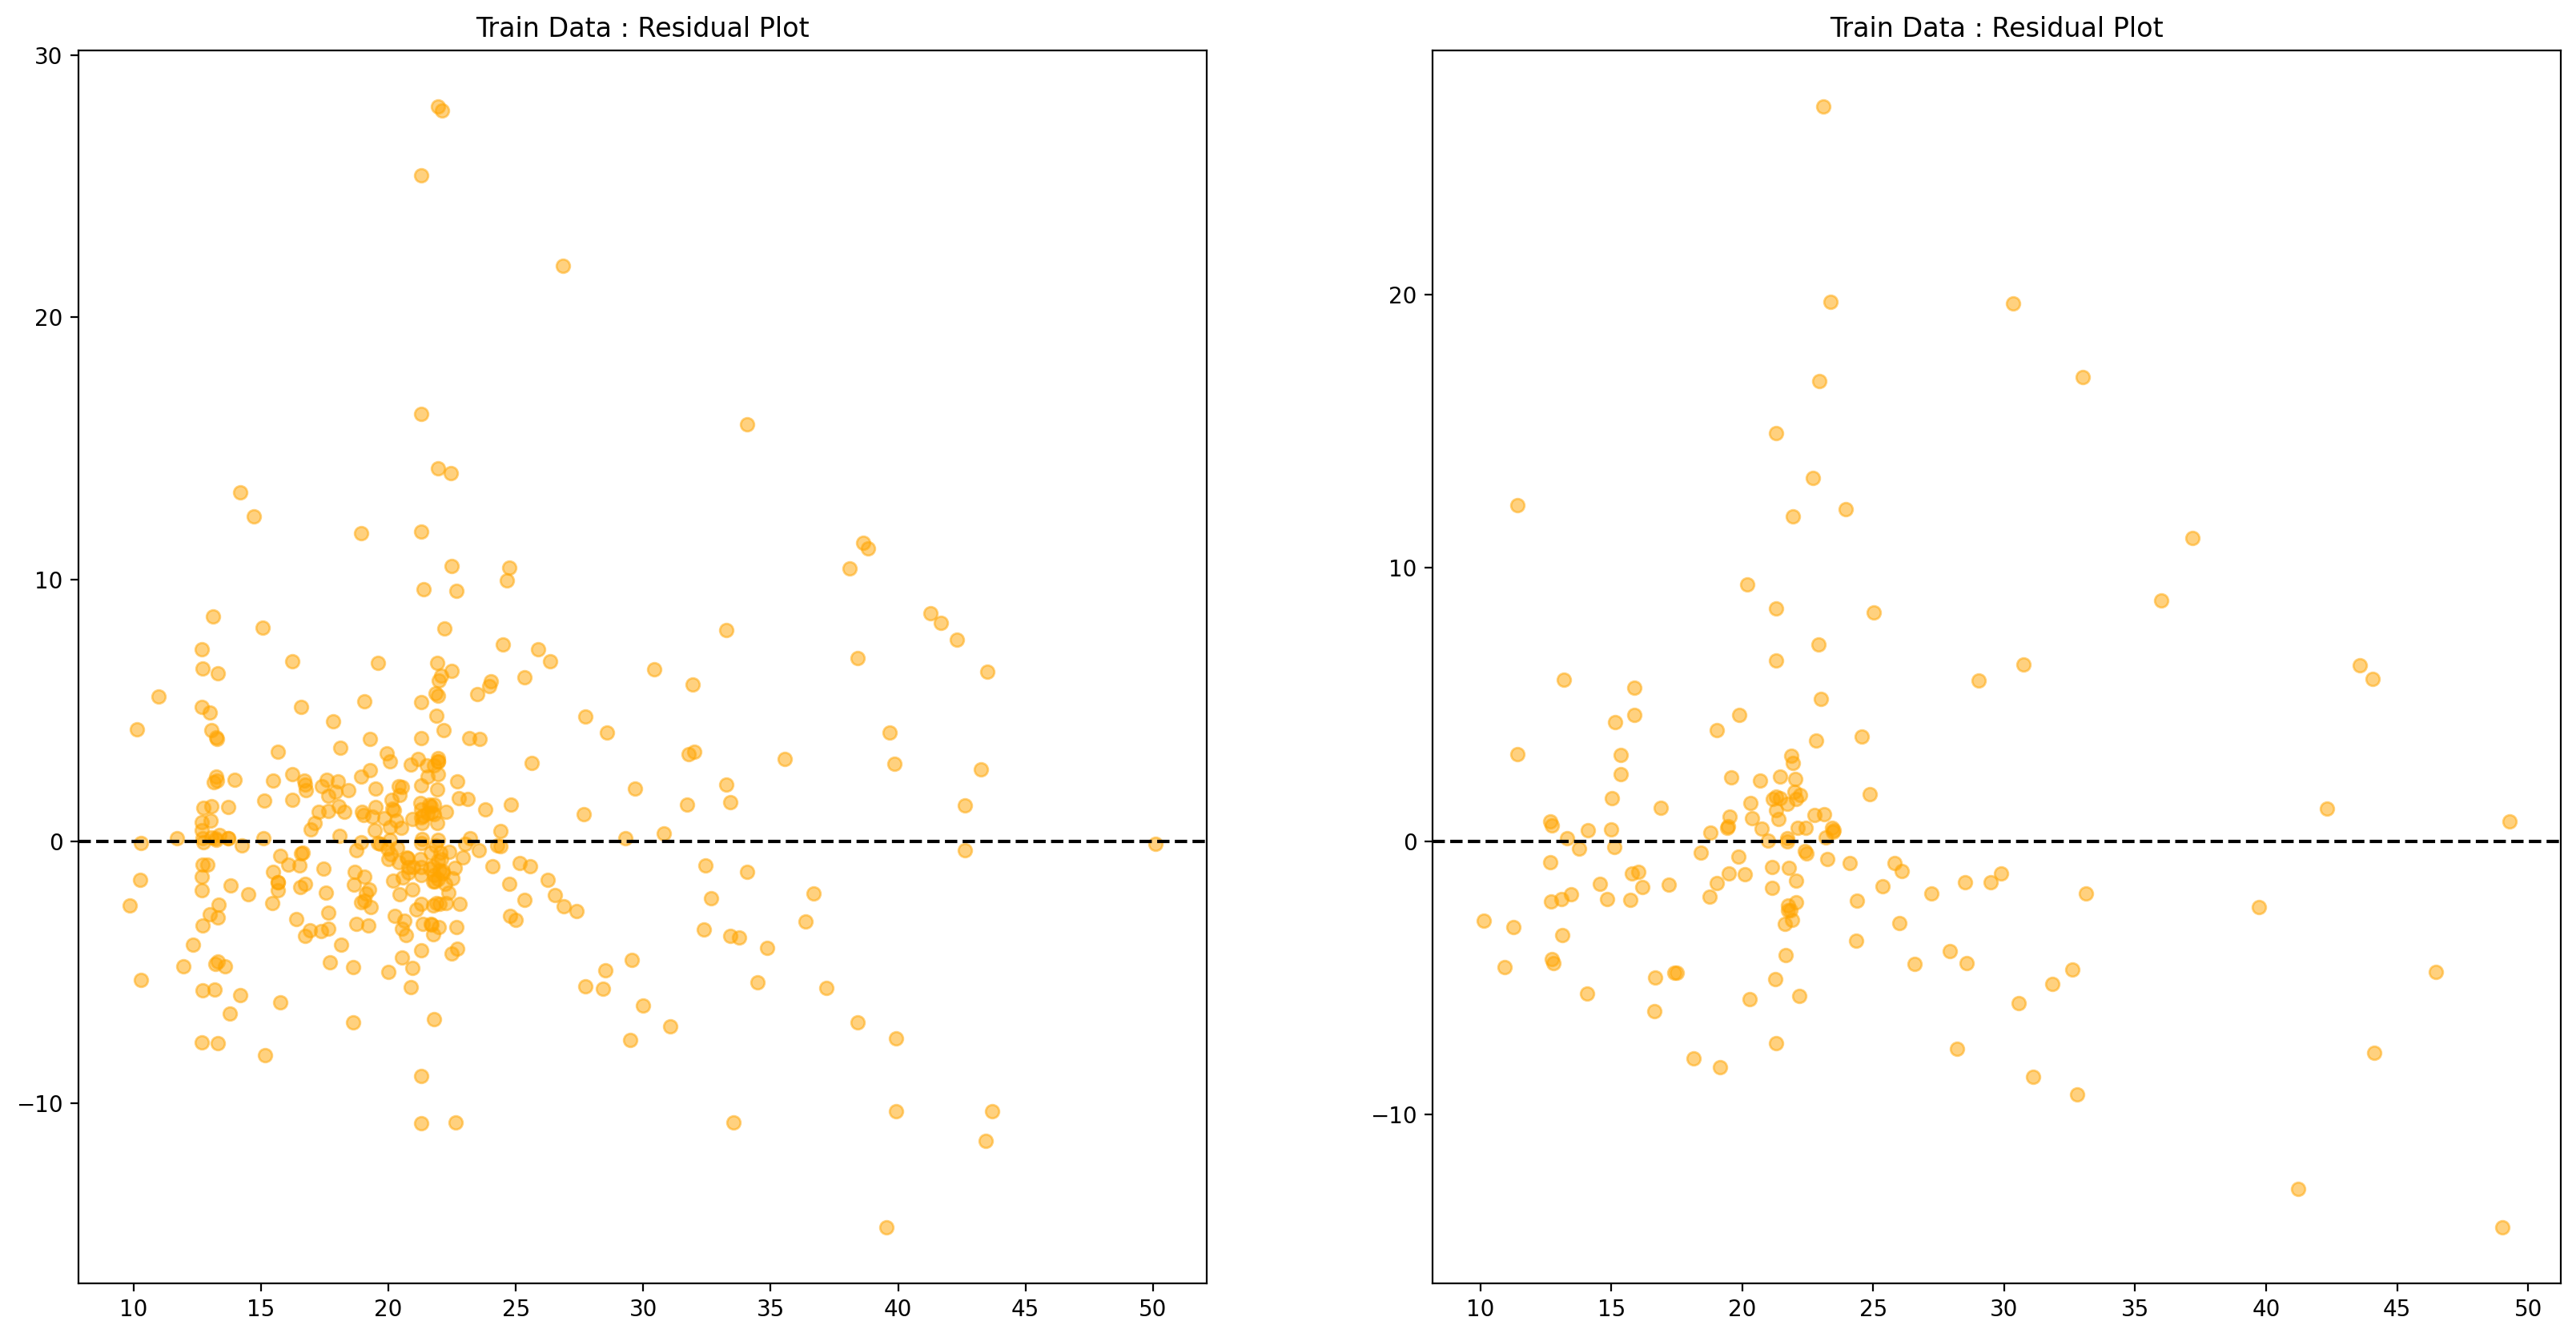

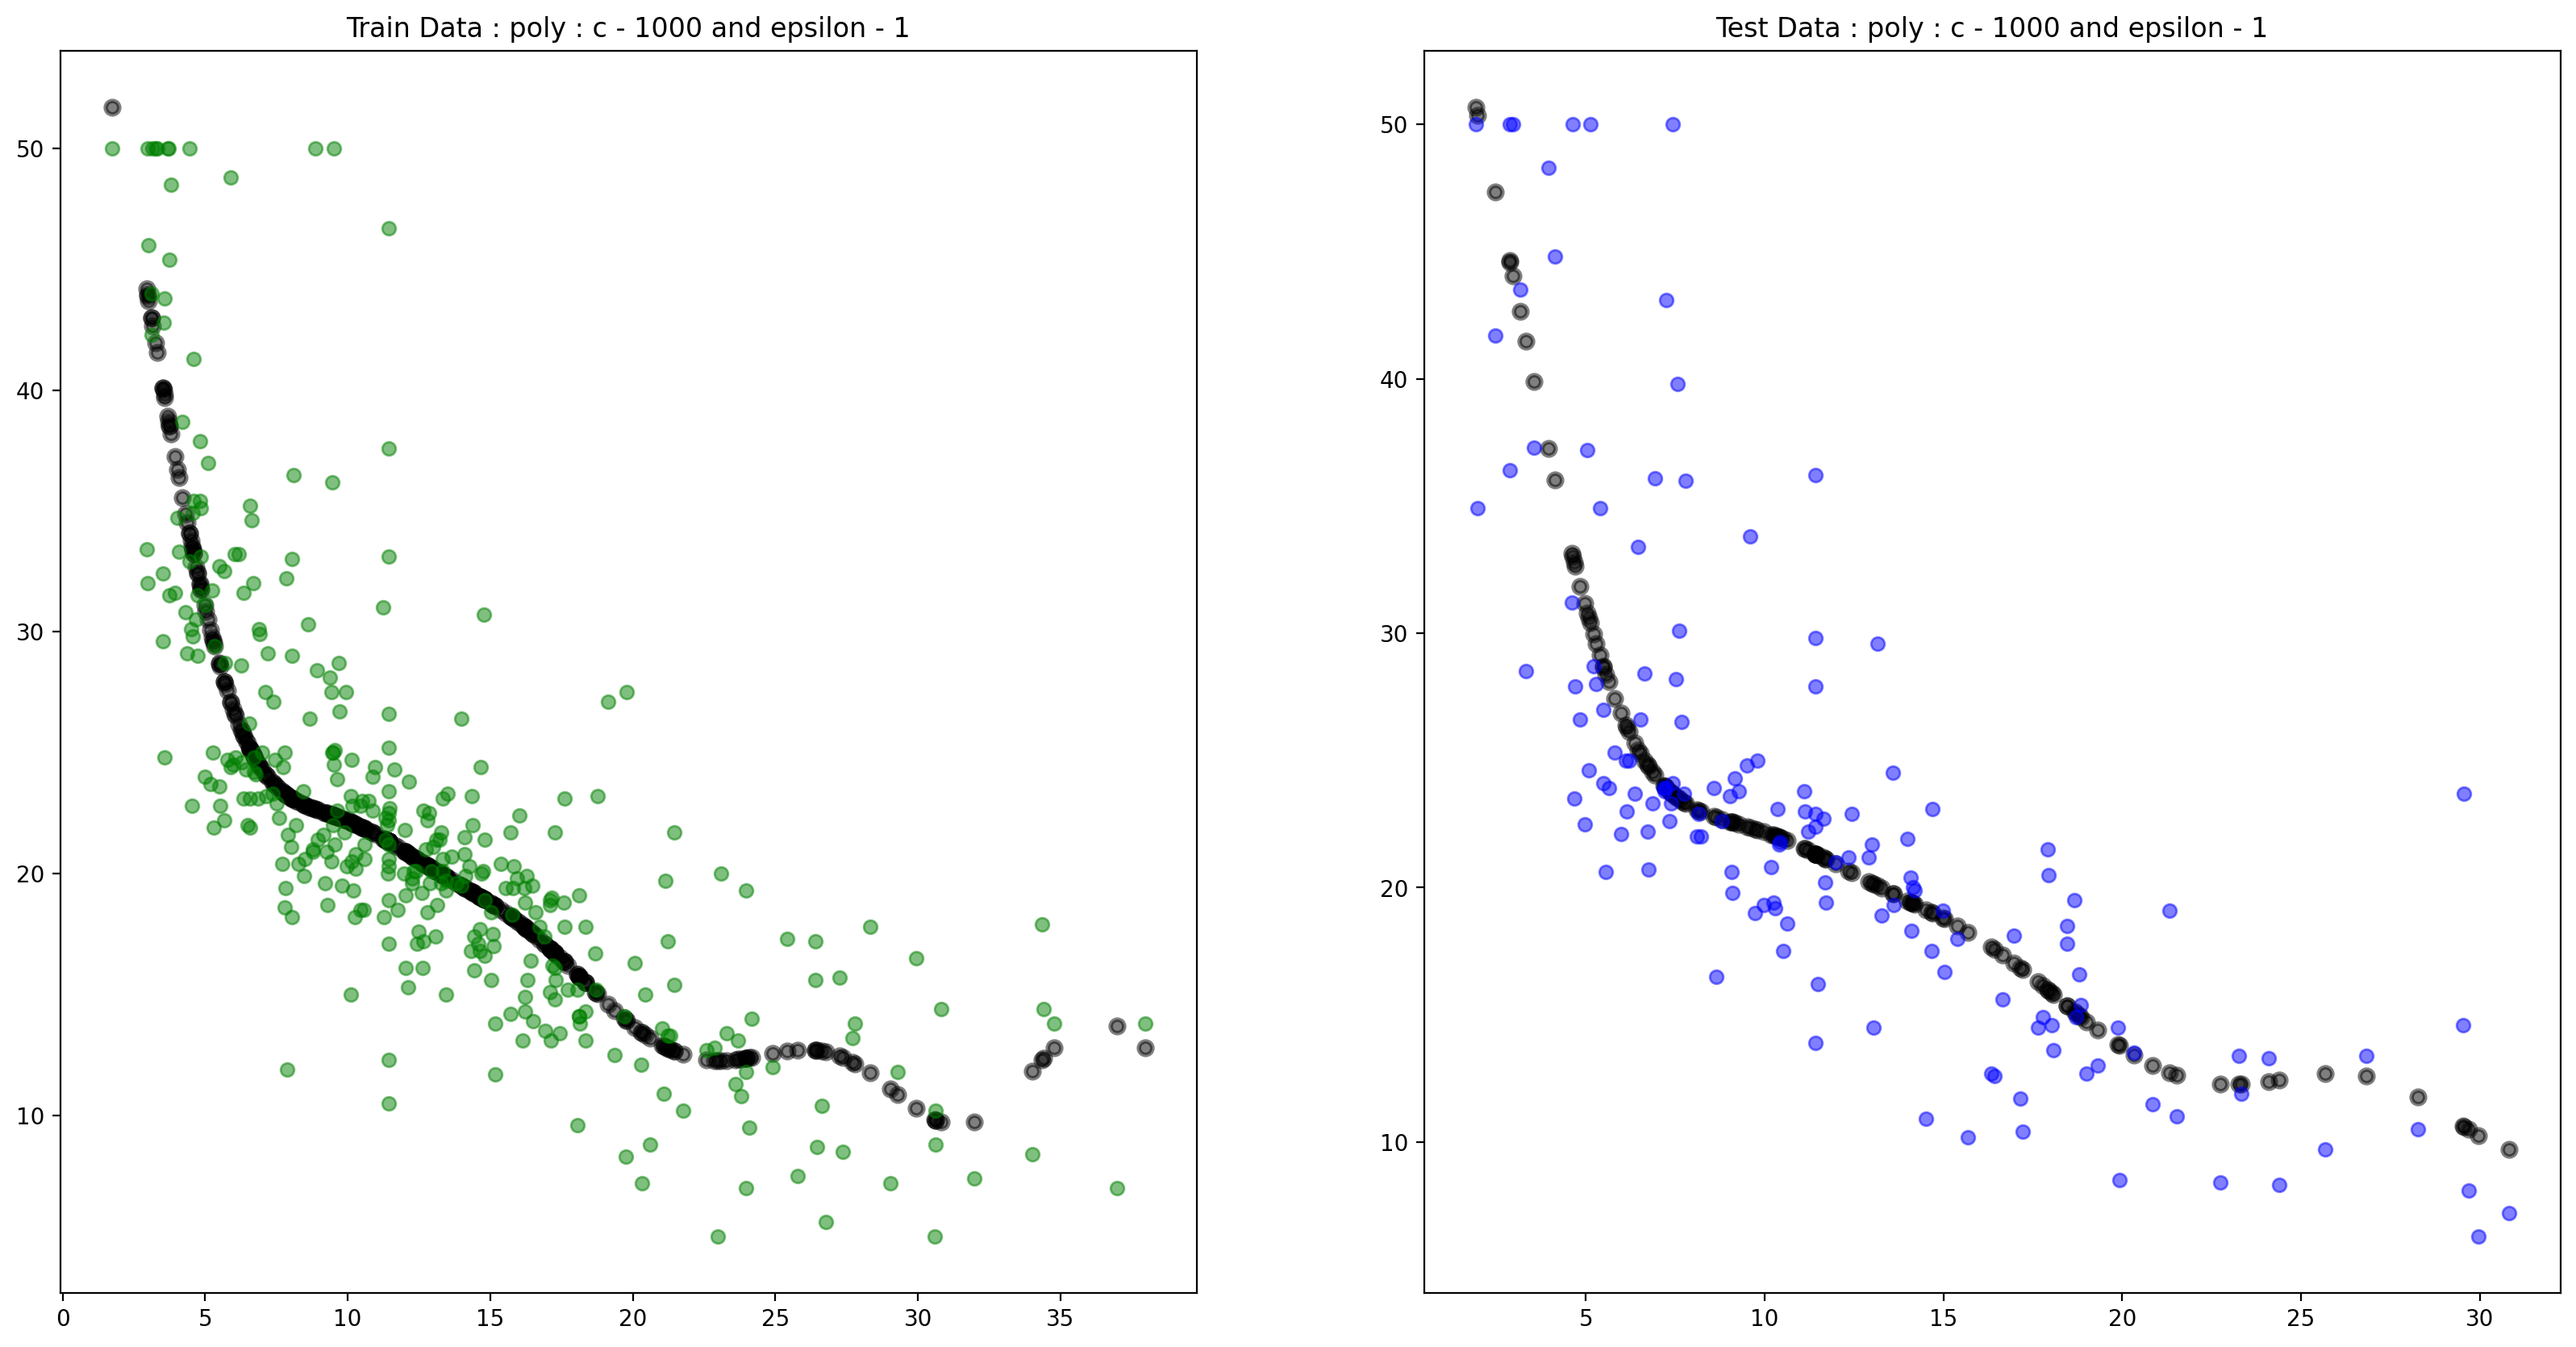

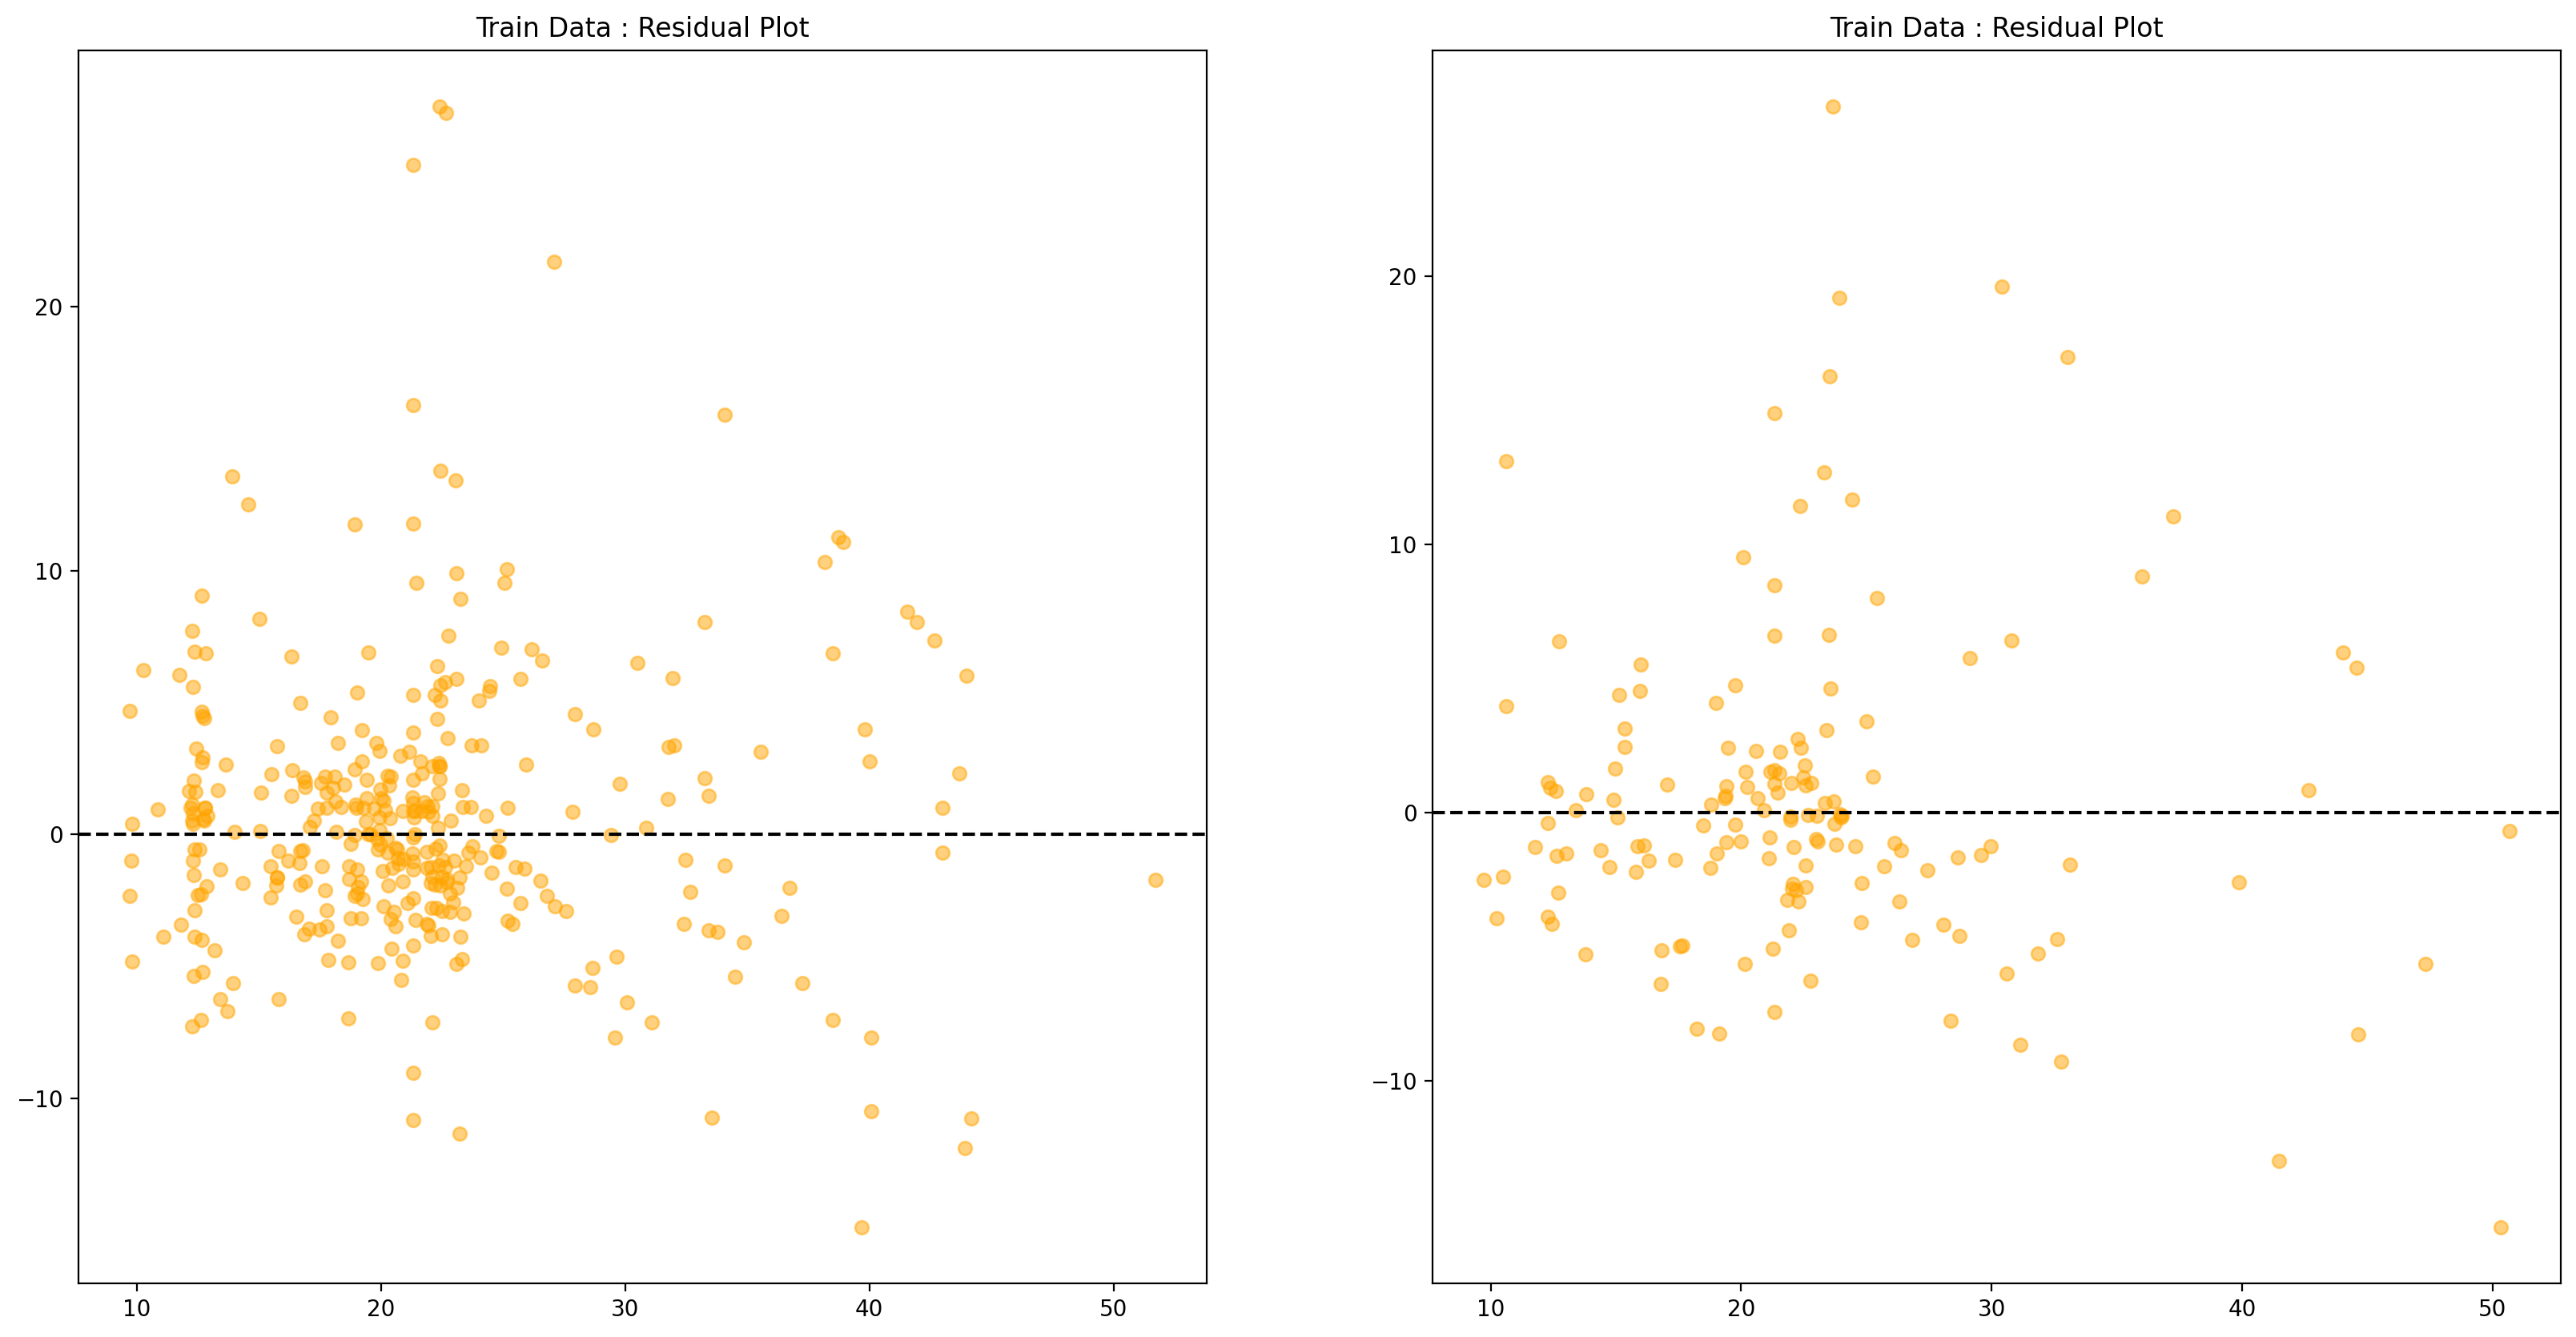

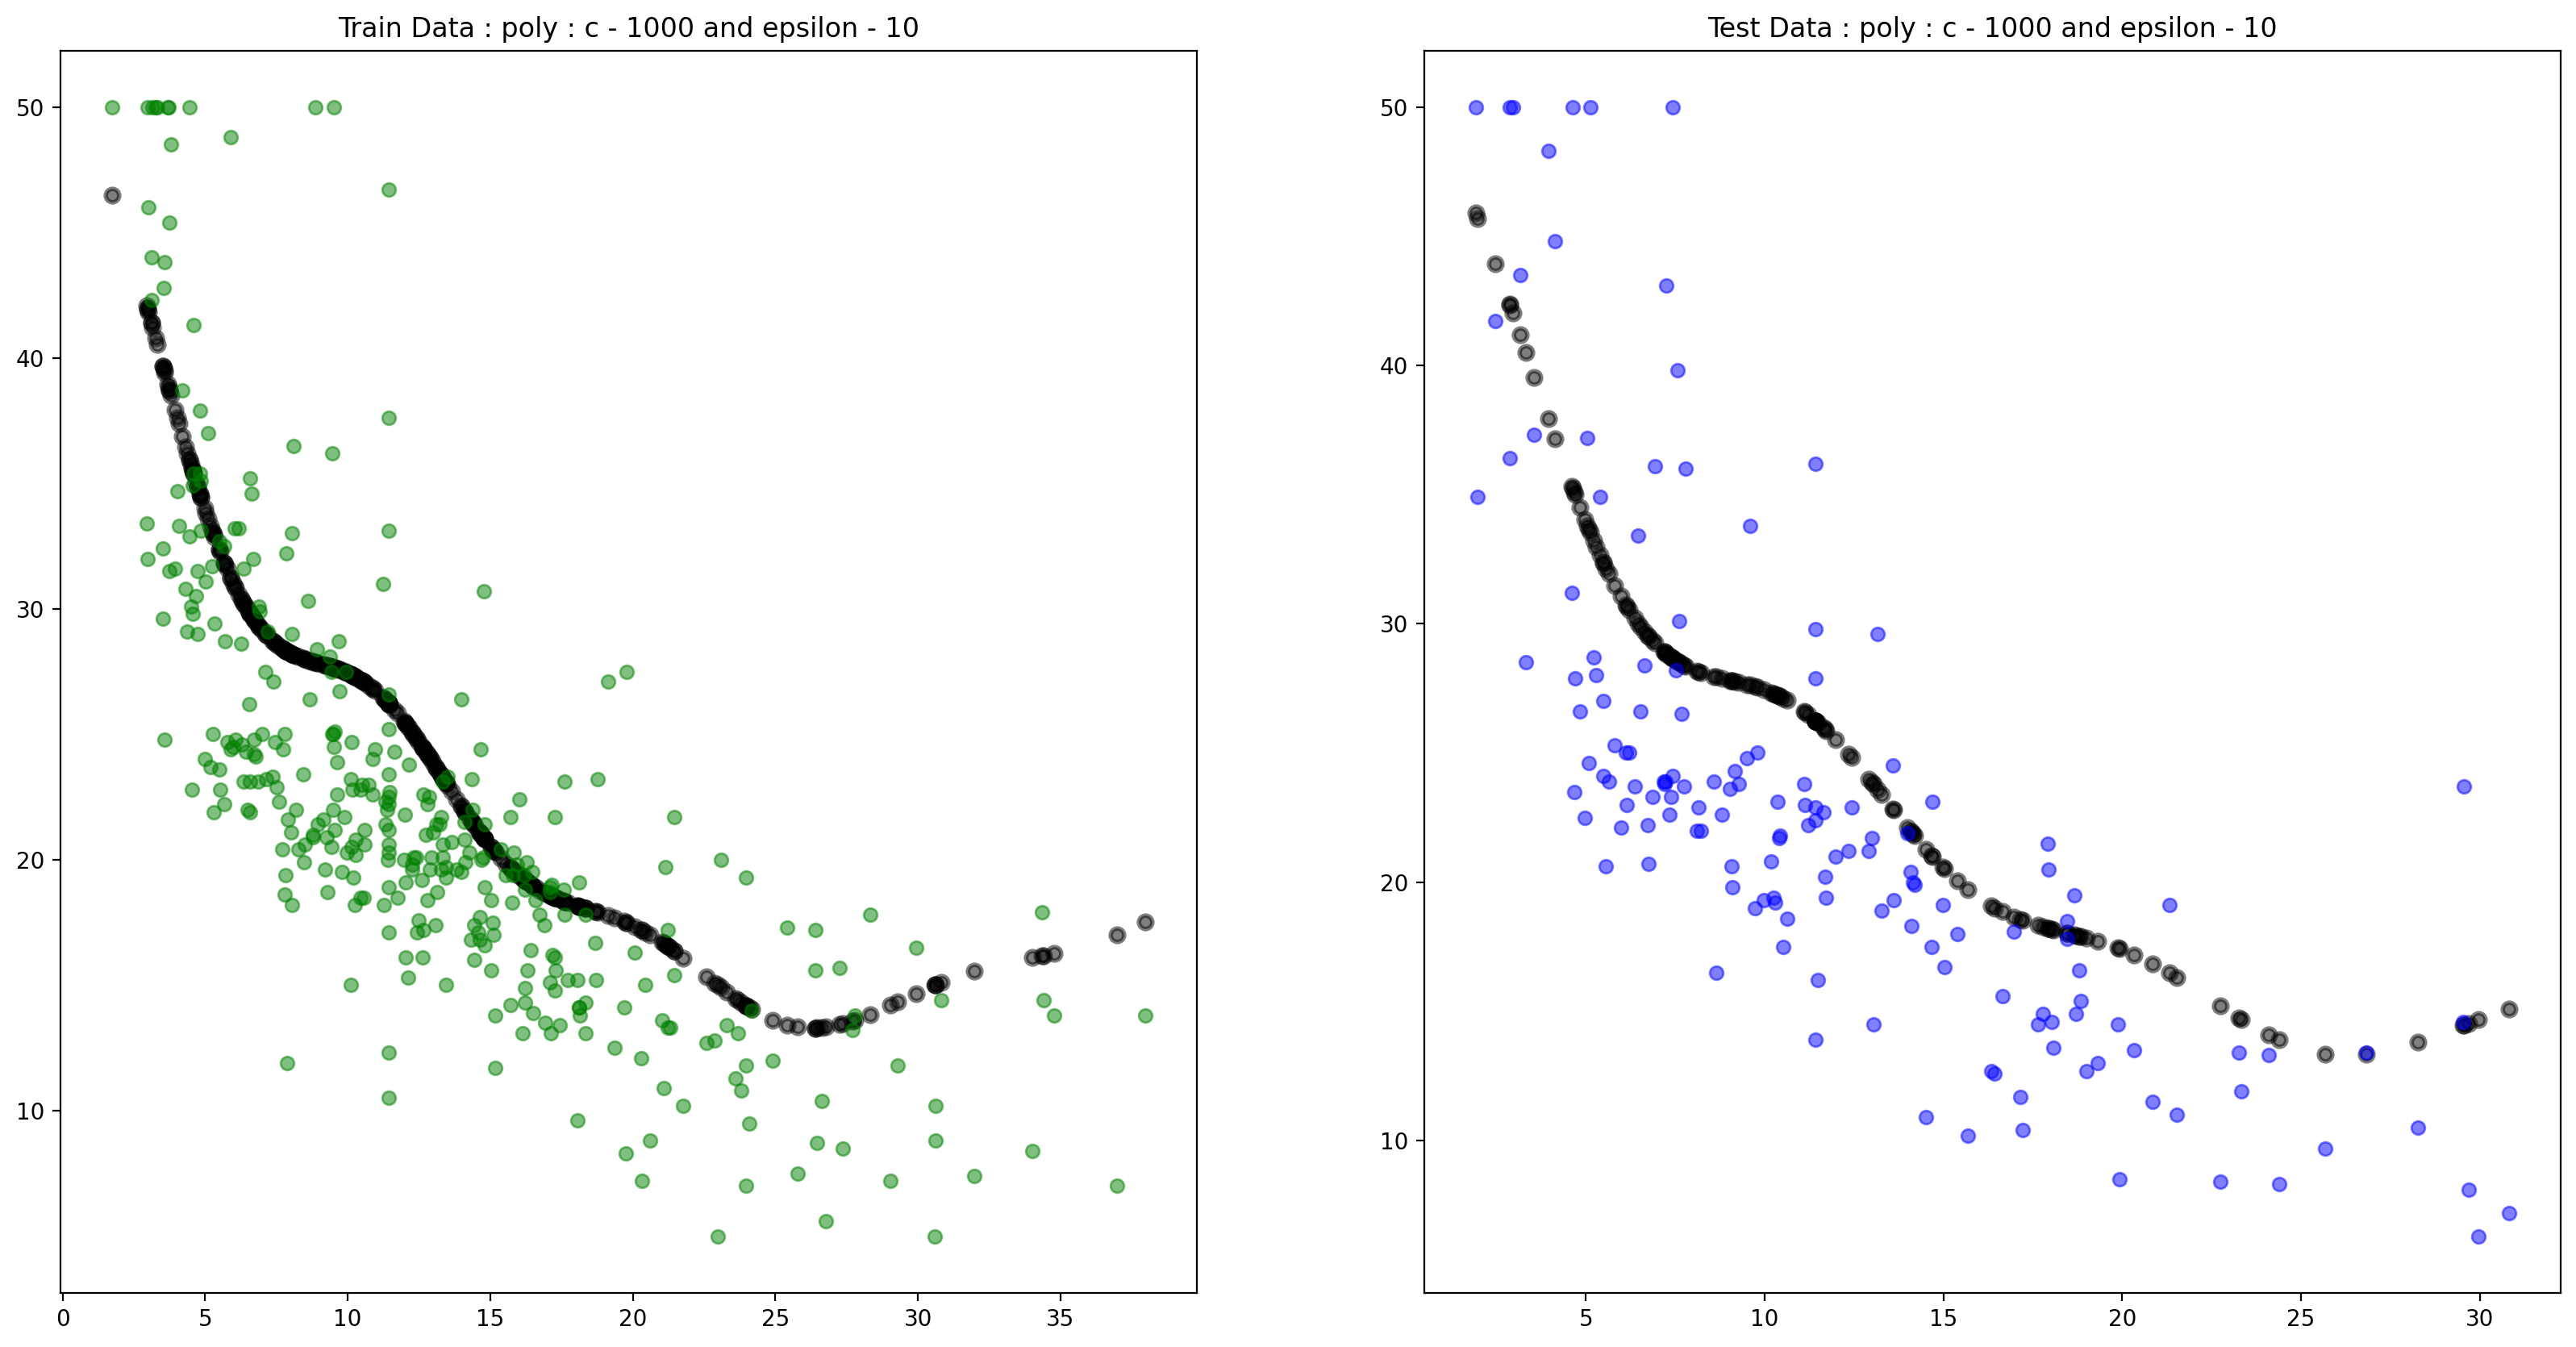

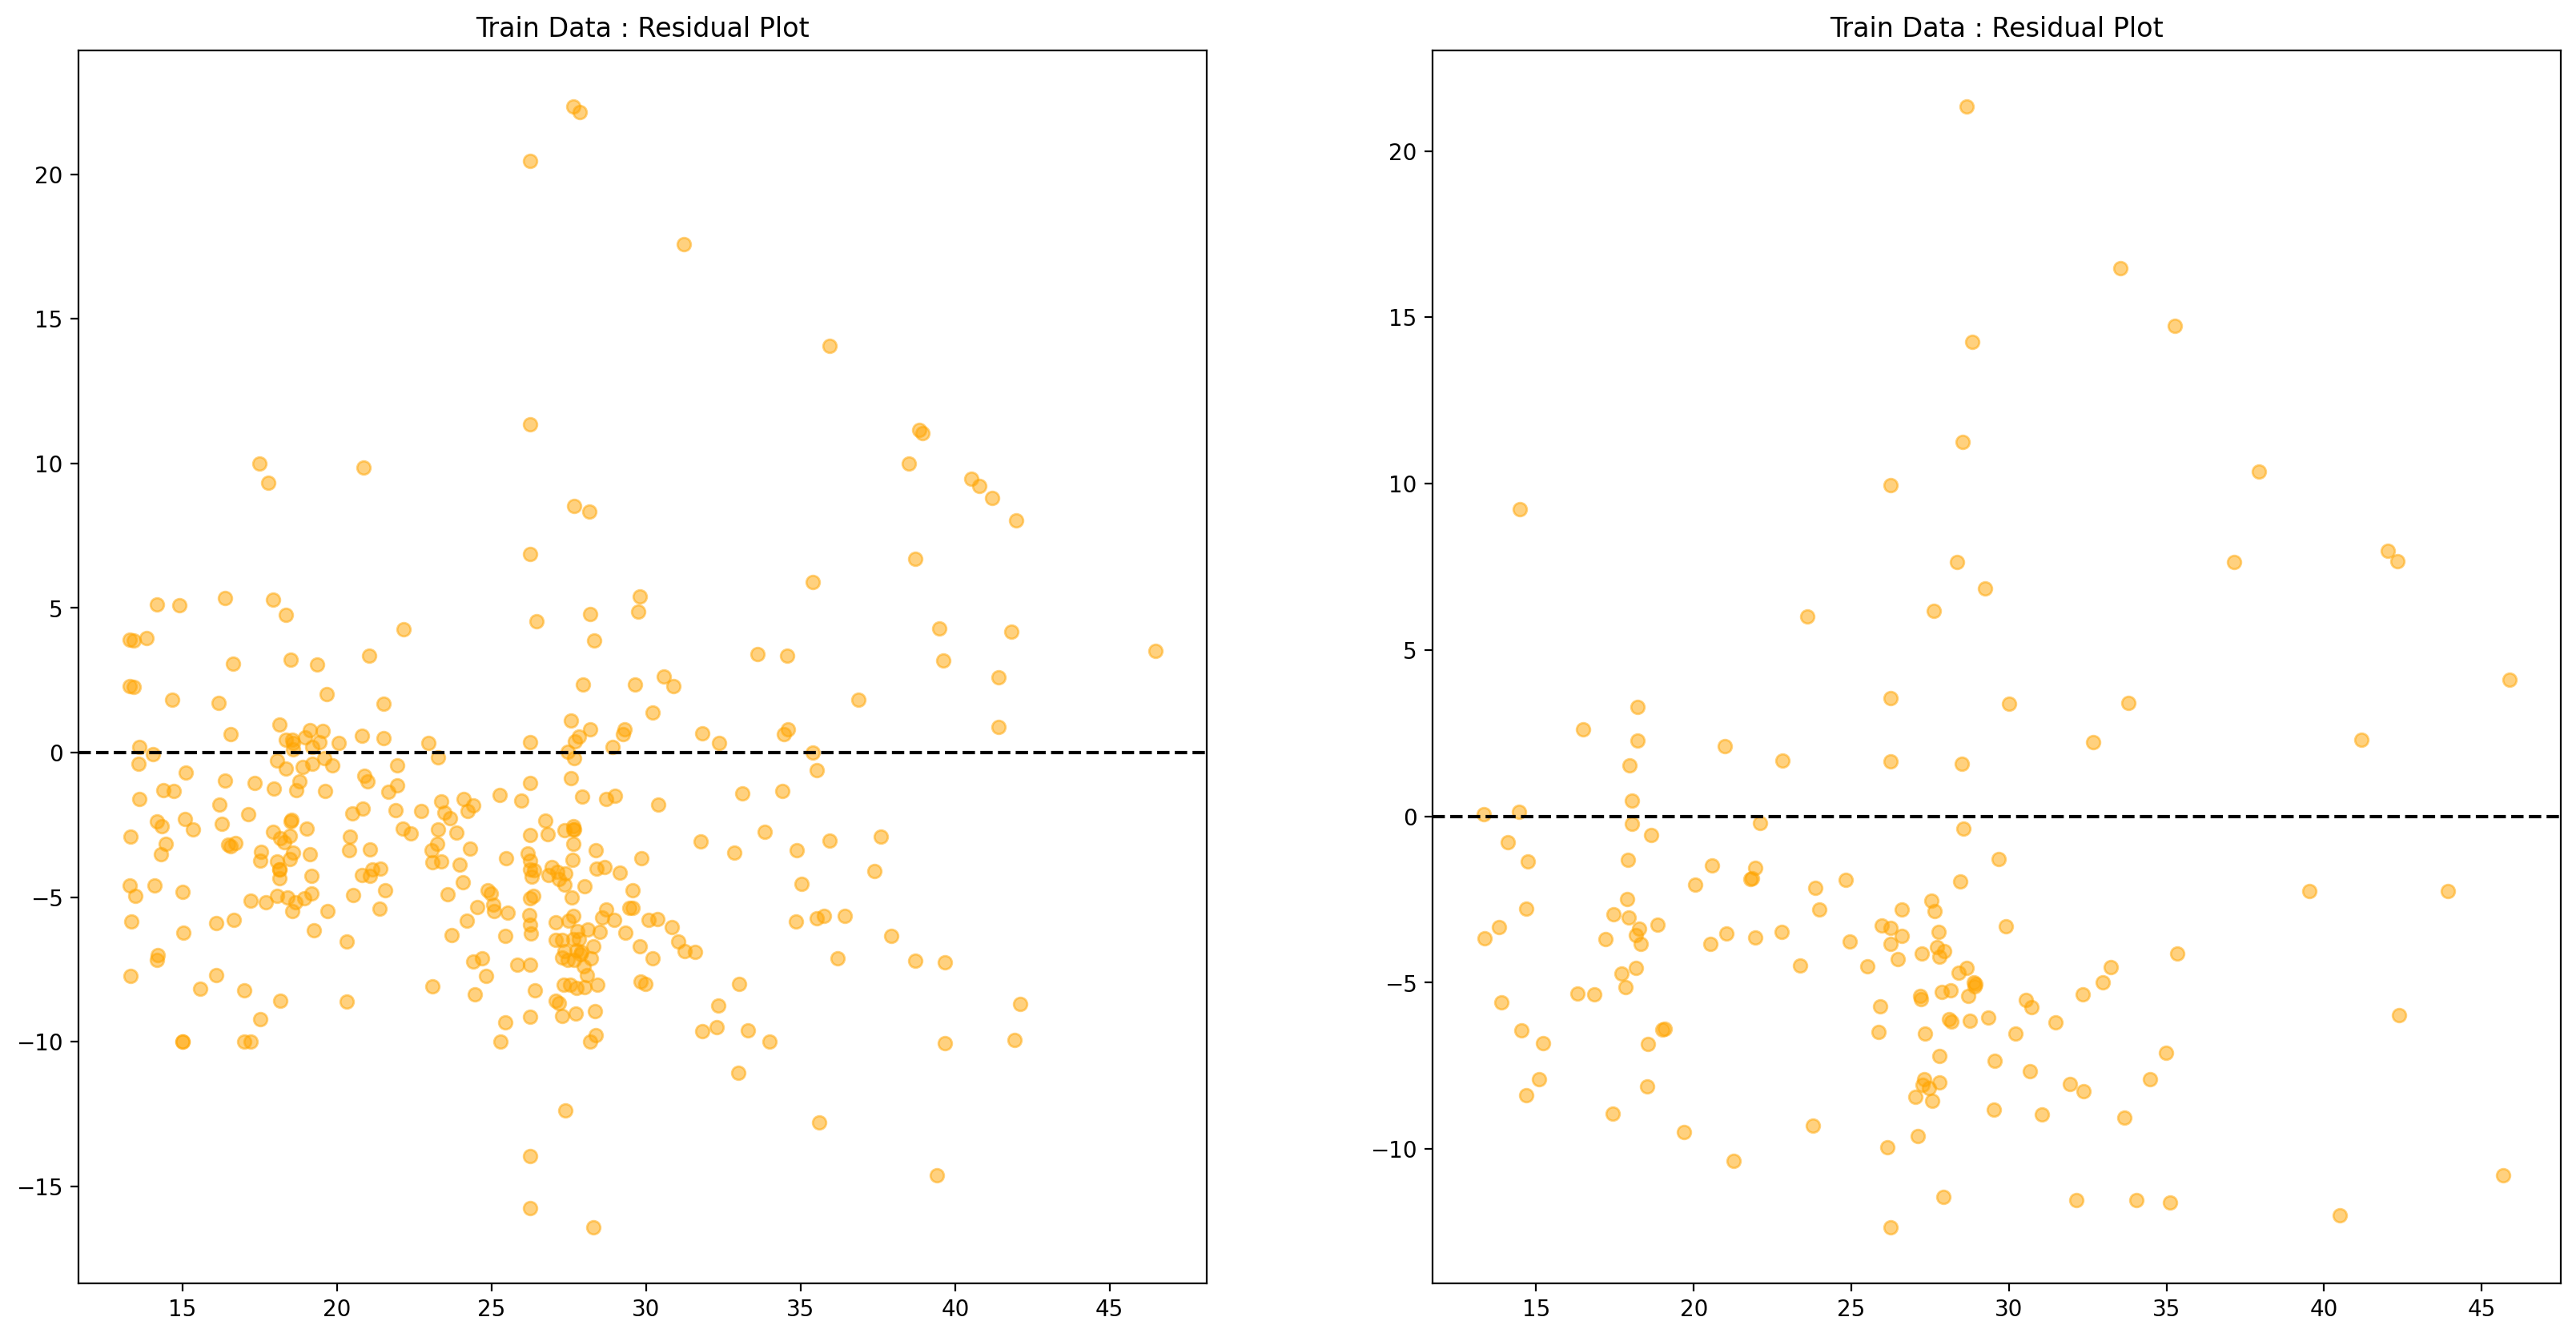

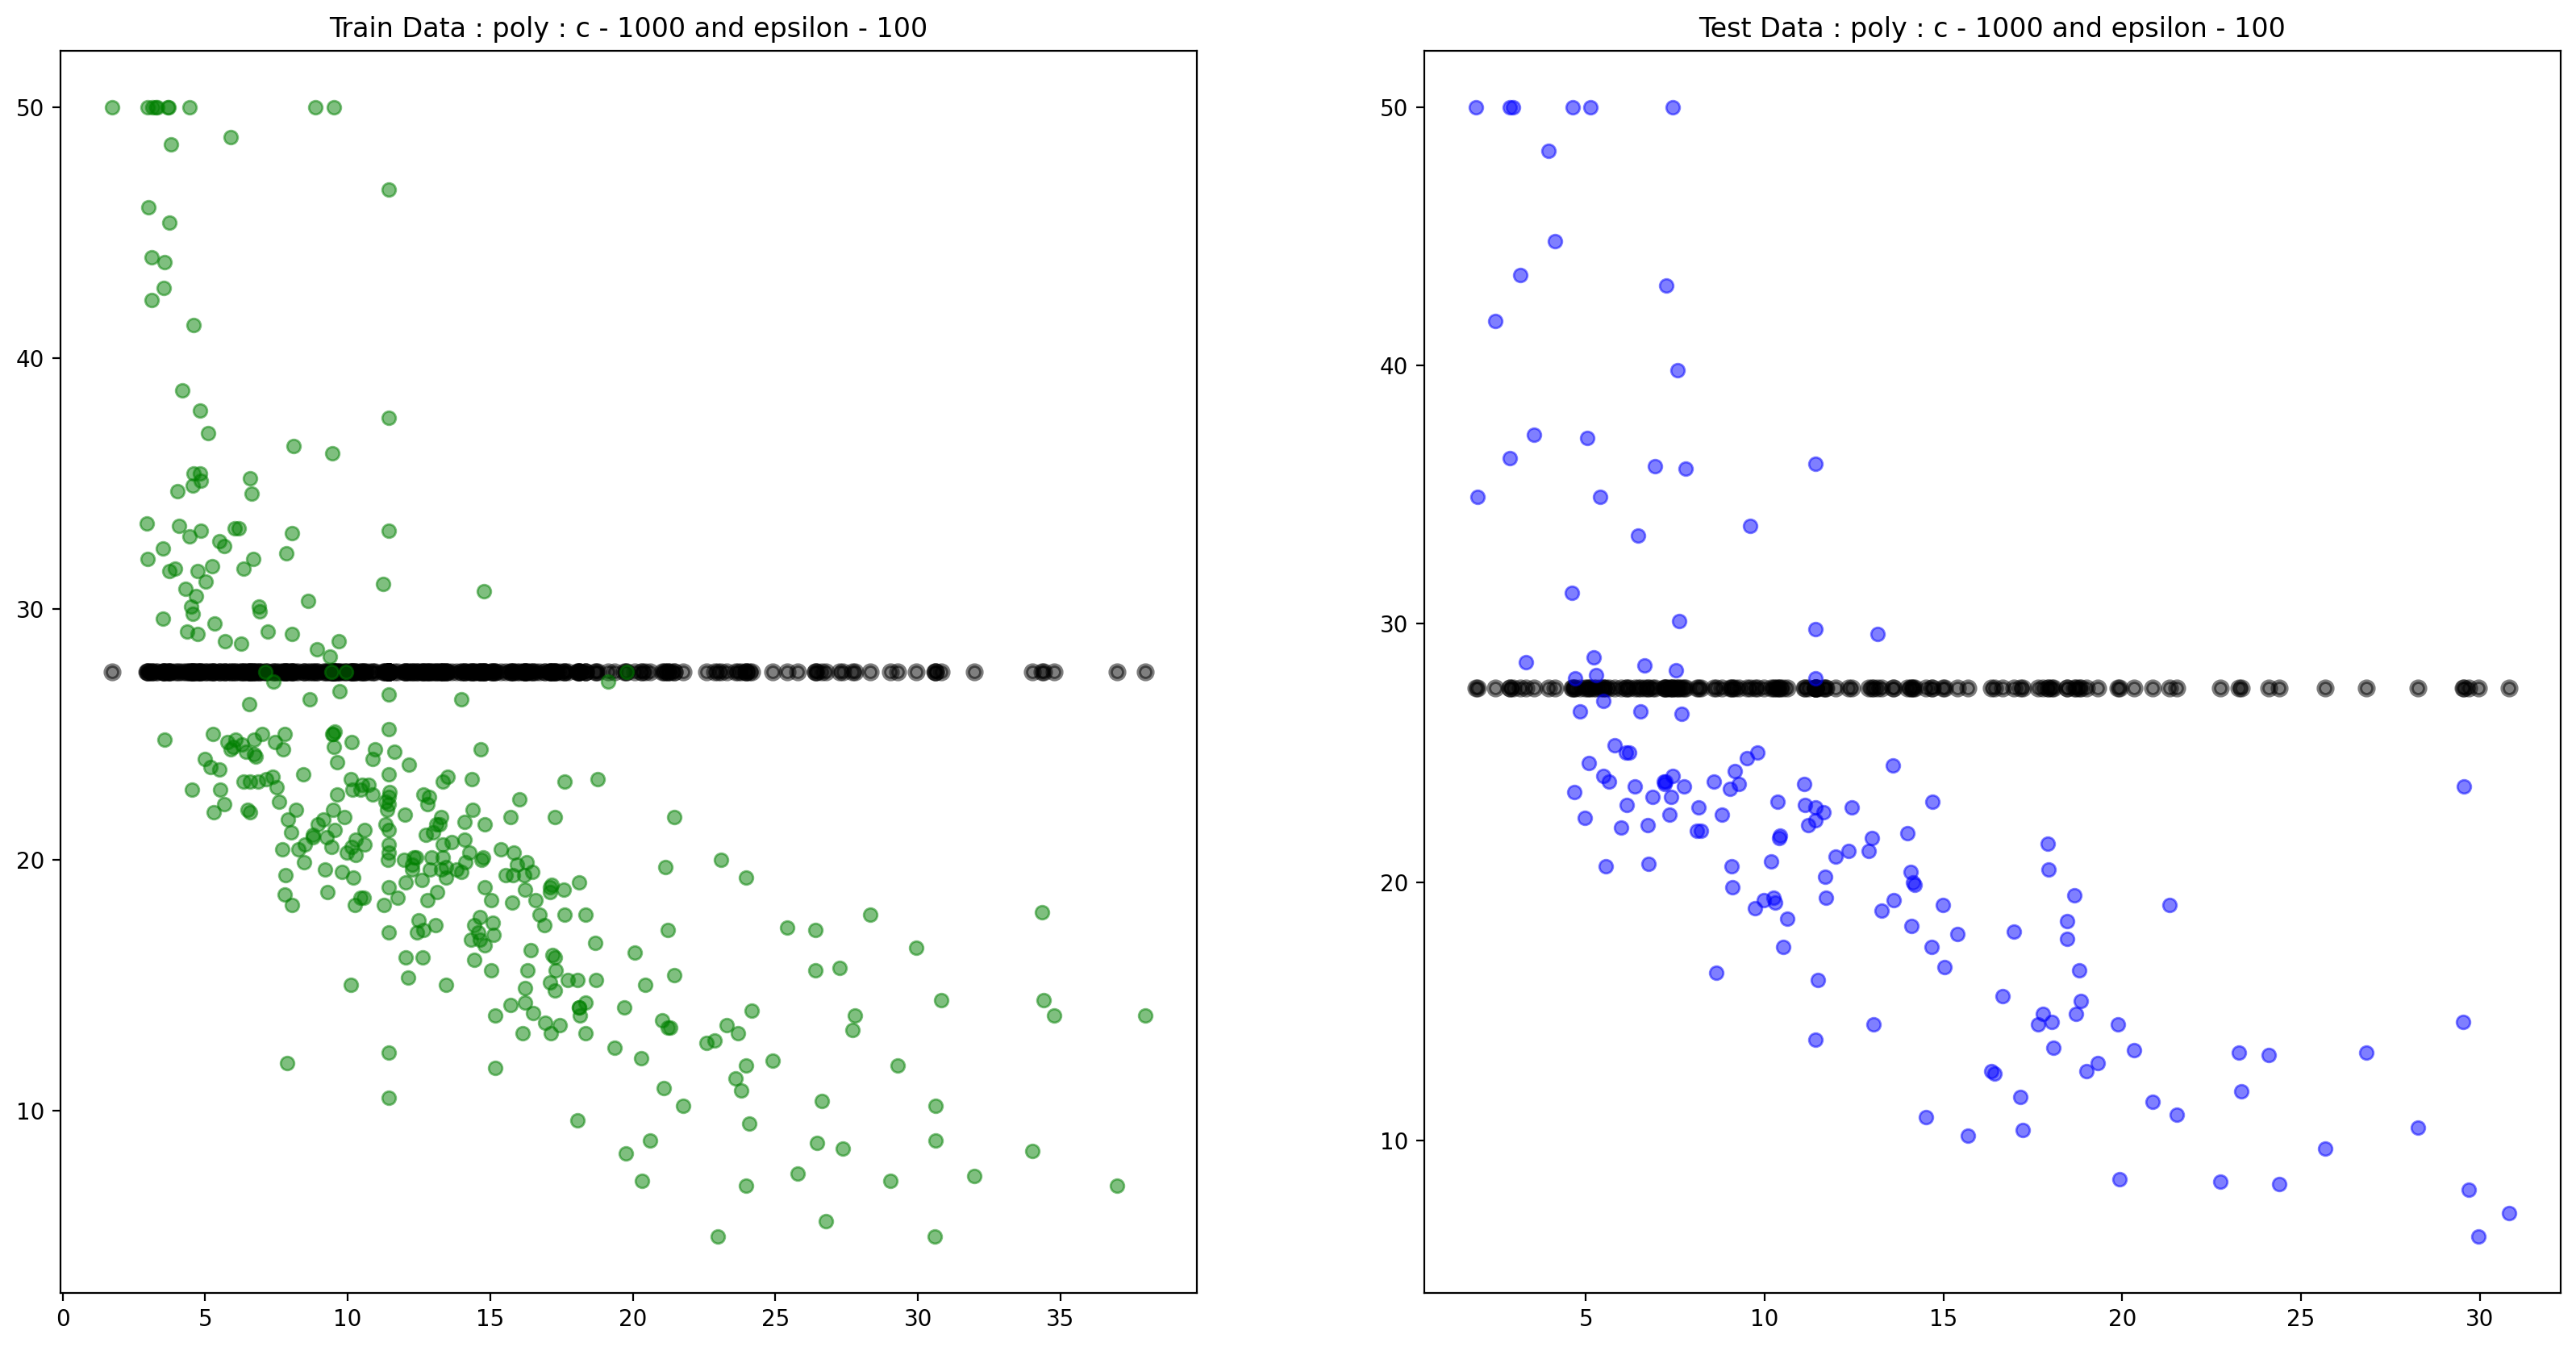

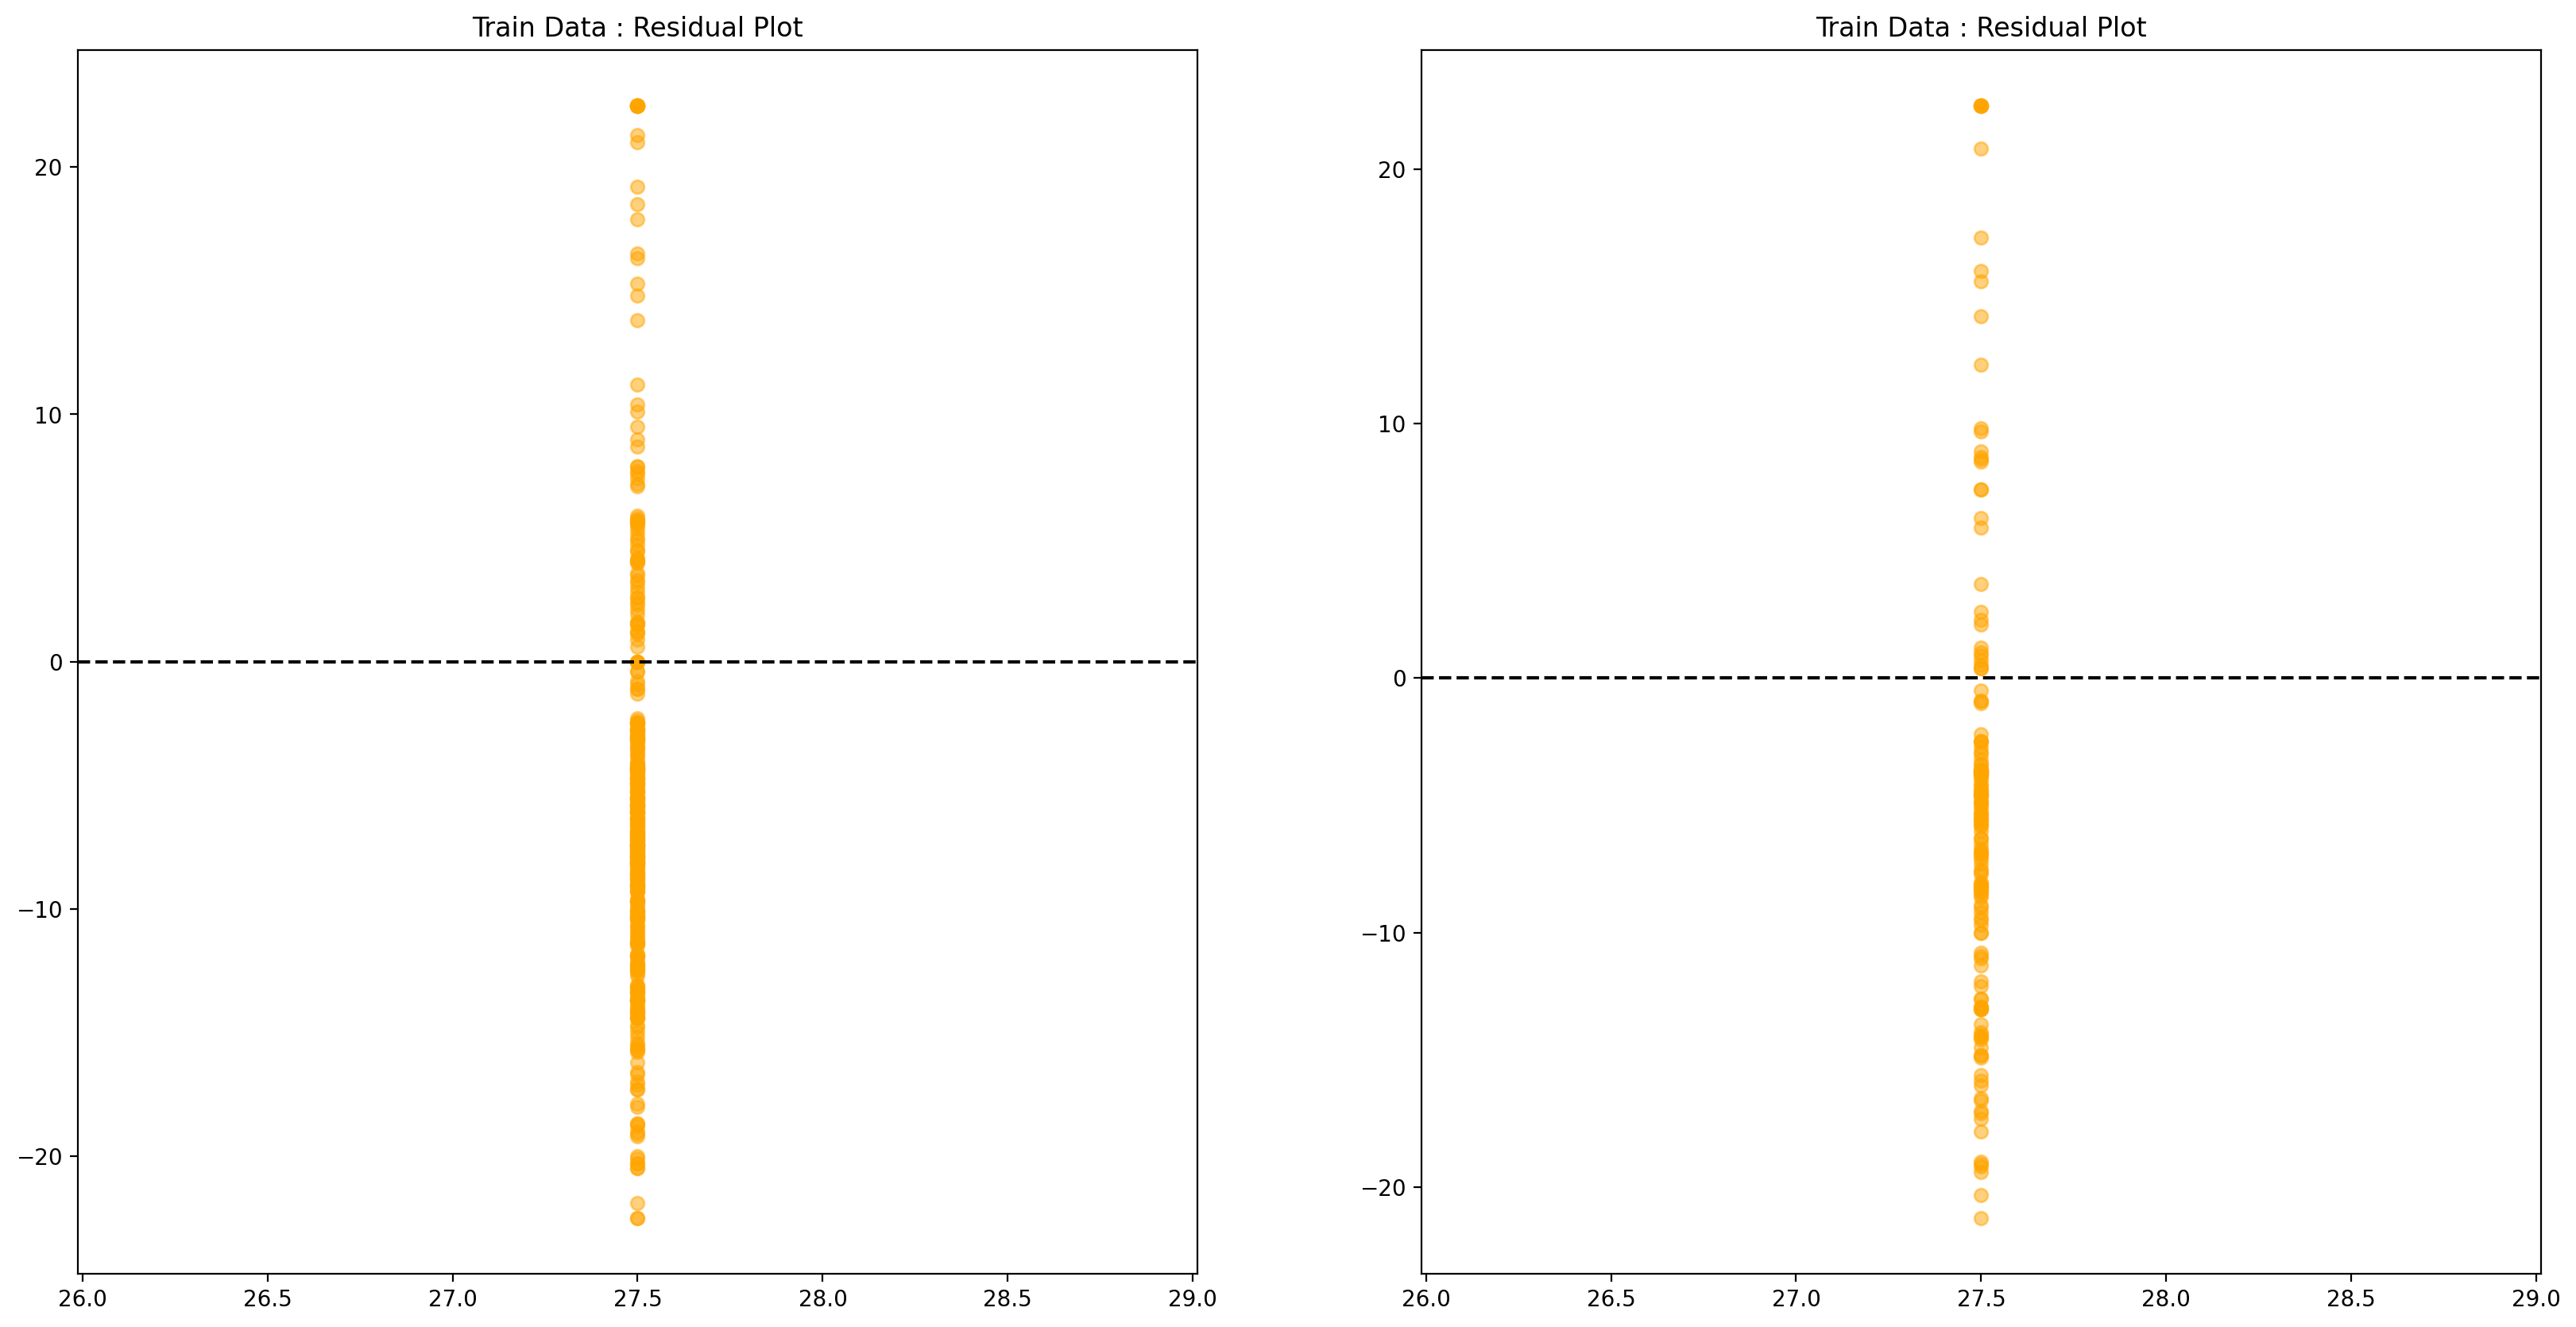

In [35]:
cols = ['model name', 'MSE Train', 'MSE Test', 'R2 Train', 'R2 Test']
params = [(1000, .001), (1000, .01), (1000, .1), (1000, 1), (1000, 10), (1000, 100)]
result = pd.DataFrame(columns = cols)
for p in params:
    
    model = SVR(C=p[0], epsilon=p[1])
    model_name = f'poly : c - {p[0]} and epsilon - {p[1]}'
    
    collect = train(model, X_train, X_train_t, y_train, X_test, X_test_t, y_test, model_name, cols)
    df2 = pd.DataFrame({
        'model name' : collect[0],
        'MSE Train' : collect[1],
        'MSE Test' : collect[2],
        'R2 Train' : collect[3],
        'R2 Test' : collect[4],
    }, index = [0])
    result = pd.concat([result, df2], axis = 0, ignore_index=True)
    
result